# The First Move Advantage: An Analysis 20,000 Chess Games

### Michael Hotaling <br> 2020-10-07 <br> DSC530

In [93]:
# pip install python-chess==1.1
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import chess.pgn as pgn
import io
import chess.engine
import chess.pgn
import chess.svg
import time
import math
from IPython.display import clear_output
#plt.style.use('fivethirtyeight')
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

The dataset I'll be using for this experiment is the [Chess Game Dataset (Lichess)](https://www.kaggle.com/datasnaek/chess) found on Kaggle

In [2]:
df = pd.read_csv("games.csv")

The dataset contains 16 attributes
<br>**`id`:** An identification code for each game. 
<br>**`rated`:** A True/False column which tells us if the game was rated
<br>**`created_at`:** A Unix timestamp of when the game was created
<br>**`last_move_at`:** A Unix timestamp of when the game was finished
<br>**`turns`:** Shows the number of turns the game lasted
<br>**`victory_status`:** Tells us if the game ended in mate, outoftime, resignation, or draw
<br>**`winner`:** Tell us who won. Either white, black, or draw
<br>**`increment_code`:** The match timer. First digit is how long the match is and second is how many seconds are added after each move
<br>**`white_id`:**  The White player's ID
<br>**`white_rating`:** White players Elo rating (according to Lichess games)
<br>**`black_id`:** The Black player's ID
<br>**`black_rating`:** Black players Elo rating (according to Lichess games)
<br>**`moves`:** The PGN code of the game, showing the moves each player makes
<br>**`opening_eco`:** The code name for each opening, available [here](https://www.365chess.com/eco.php)
<br>**`opening_name`:** The official chess opening name 
<br>**`opening_ply`:** The number of moves in each opening phase

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
player_ratings = []
colors = []
white_players = []

for i,j in zip(df['white_rating'], df['black_rating']):
    player_ratings.append(i)
    white_players.append(i)
    player_ratings.append(j)
player_ratings = np.array(player_ratings)

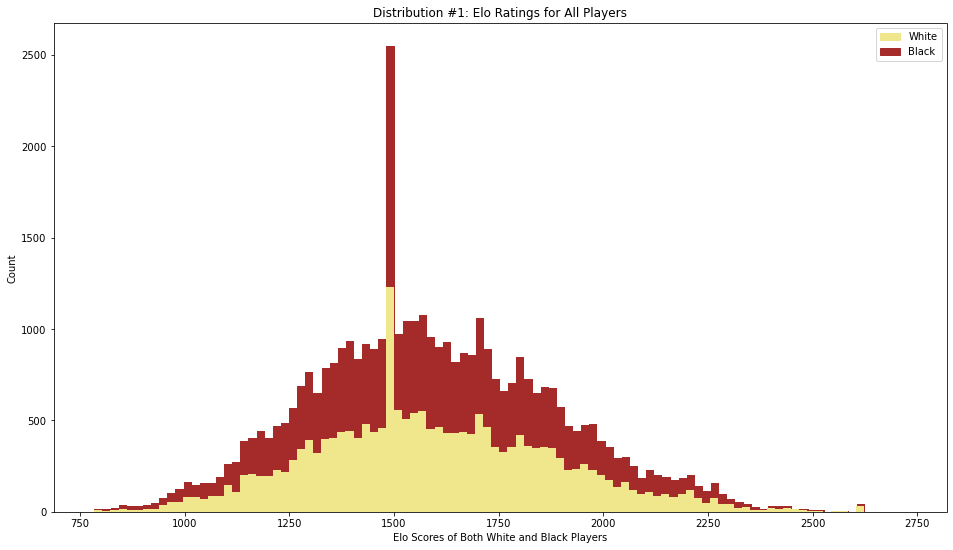

In [5]:
white_patch = mpatches.Patch(color='khaki', label='White')
black_patch = mpatches.Patch(color='brown', label='Black')


plt.figure(figsize=(16, 9))
plt.hist(player_ratings, bins = 100, color = "brown");
plt.hist(white_players, bins = 99, color = "khaki")
plt.title("Distribution #1: Elo Ratings for All Players");
plt.xlabel("Elo Scores of Both White and Black Players");
plt.ylabel("Count");
plt.legend(handles=[white_patch, black_patch]);
plt.plot();

In [6]:
print("Mean Rating: {:.2f}".format(np.mean(player_ratings)))
print("Median Rating: {:.2f}".format(np.median(player_ratings)))
print("Mode of Ratings: {:.2f}".format(int(ss.mode(player_ratings)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(player_ratings))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(player_ratings))))

Mean Rating: 1592.73
Median Rating: 1564.00
Mode of Ratings: 1500.00
Skew of Ratings: 0.28
Kurtosis of Ratings: -0.03


In [7]:
dfnew = df[df['rated'] == True]

player_ratings = []
colors = []
white_players = []

for i,j in zip(dfnew['white_rating'], dfnew['black_rating']):
    player_ratings.append(i)
    white_players.append(i)
    player_ratings.append(j)
player_ratings = np.array(player_ratings)

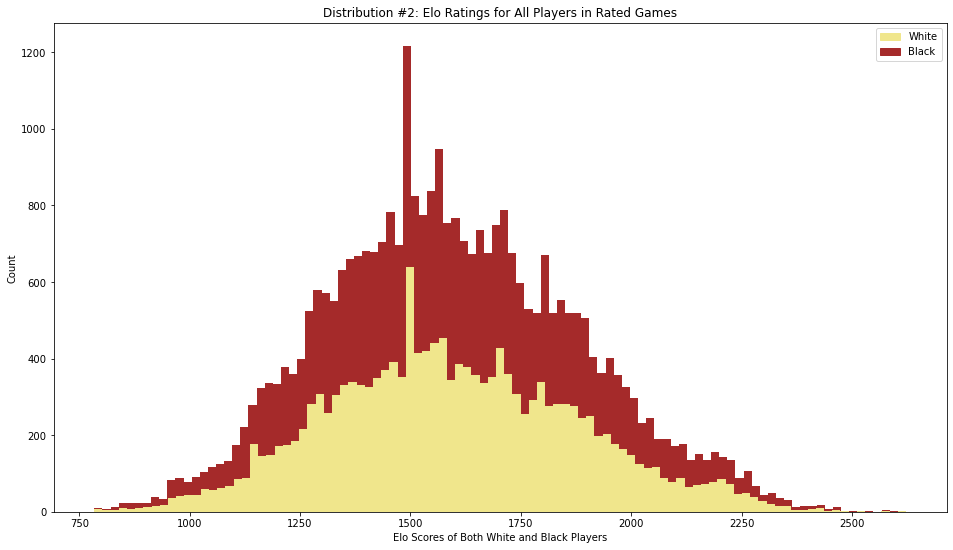

In [8]:
plt.figure(figsize=(16, 9))
plt.hist(player_ratings, bins = 100, color = "brown");
plt.hist(white_players, bins = 99, color = "khaki")
plt.title("Distribution #2: Elo Ratings for All Players in Rated Games");
plt.xlabel("Elo Scores of Both White and Black Players");
plt.ylabel("Count");
plt.legend(handles=[white_patch, black_patch]);
plt.plot();

In [9]:
print("Mean rating: {:.2f}".format(np.mean(player_ratings)))
print("Median rating: {}".format(np.median(player_ratings)))
print("Mode rating: {}".format(int(ss.mode(player_ratings)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(player_ratings))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(player_ratings))))

Mean rating: 1595.30
Median rating: 1575.0
Mode rating: 1500
Skew of Ratings: 0.20
Kurtosis of Ratings: -0.23


In [10]:
exclude_1500 = []
exclude_1500_white = []

for i,j in zip(df['white_rating'],df['black_rating']):
    if i != 1500:
        exclude_1500.append(i)
    if j != 1500:
        exclude_1500.append(j)
        
for i in df['white_rating']:
    if i != 1500:
        exclude_1500_white.append(i)

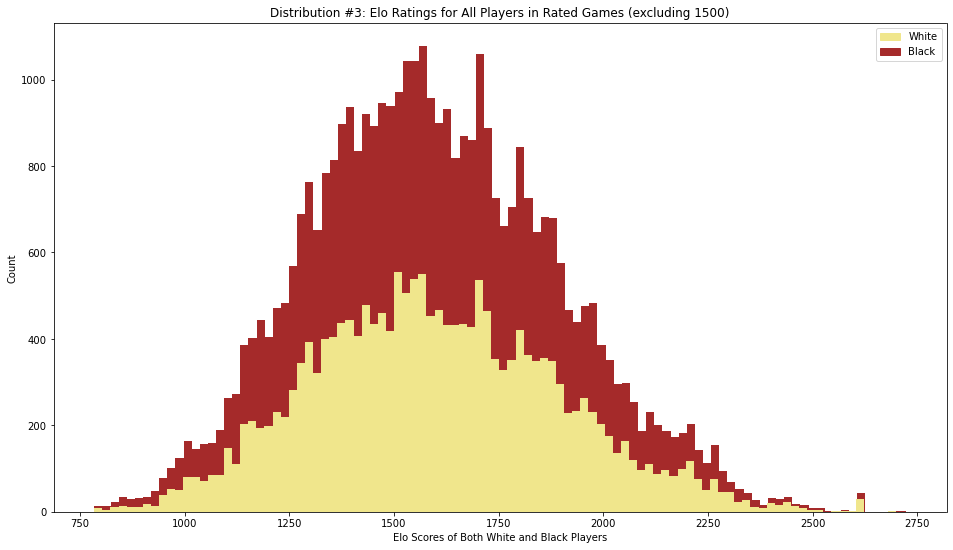

In [11]:
plt.figure(figsize=(16, 9))
plt.hist(exclude_1500, bins = 100, color = "brown");
plt.hist(exclude_1500_white, bins = 99, color = "khaki")
plt.title("Distribution #3: Elo Ratings for All Players in Rated Games (excluding 1500)");
plt.xlabel("Elo Scores of Both White and Black Players");
plt.ylabel("Count");
plt.legend(handles=[white_patch, black_patch]);
plt.plot();

In [12]:
print("Mean rating: {:.2f}".format(np.mean(exclude_1500)))
print("Median rating: {}".format(np.median(exclude_1500)))
print("Mode rating: {}".format(int(ss.mode(exclude_1500)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(exclude_1500))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(exclude_1500))))

Mean rating: 1596.61
Median rating: 1579.0
Mode rating: 1400
Skew of Ratings: 0.24
Kurtosis of Ratings: -0.14


In [13]:
mu, sigma = ss.norm.fit(exclude_1500)
histplot = ss.norm(mu,sigma).rvs(100000000)

print("mu: {:.2f}".format(mu))
print("sigma: {:.2f}".format(sigma))

mu: 1596.61
sigma: 296.55


<ipython-input-14-fa0756355394>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;


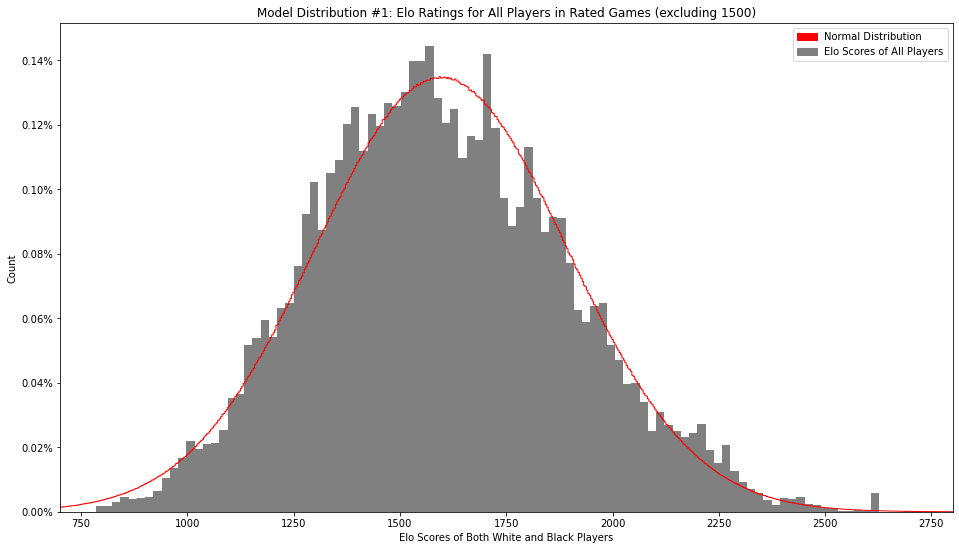

In [14]:
red_patch = mpatches.Patch(color='red', label='Normal Distribution')
grey_patch = mpatches.Patch(color='grey', label='Elo Scores of All Players')


plt.figure(figsize=(16, 9))
plt.hist(exclude_1500, bins = 100, color = "grey", density=True);
plt.hist(histplot, bins = 1000, color = "red", histtype="step", density=True)
plt.title("Model Distribution #1: Elo Ratings for All Players in Rated Games (excluding 1500)");
plt.xlabel("Elo Scores of Both White and Black Players");
plt.ylabel("Count");
plt.xlim(700, 2800)
plt.legend(handles=[red_patch, grey_patch]);
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;
plt.plot();

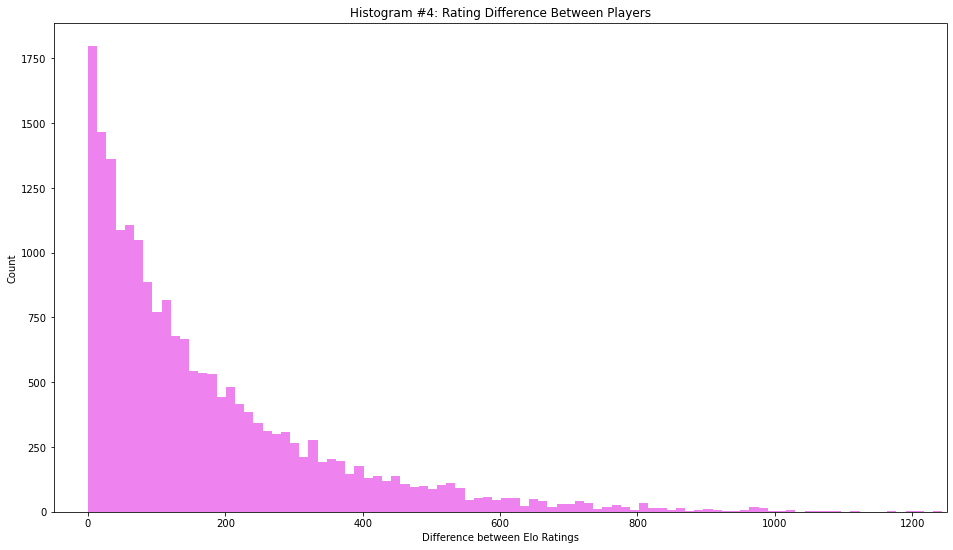

In [15]:
def cdf_finder(array, percentage):
    x = 0
    l = len(array)
    for i in np.sort(array):
        x += 1
        if x / l > percentage:
            break
    return i

df['rate_difference'] = np.abs(df['white_rating'] - df['black_rating'])

plt.figure(figsize=(16, 9))
plt.hist(df['rate_difference'], bins = 120, color = "violet");
plt.title("Histogram #4: Rating Difference Between Players");
plt.xlabel("Difference between Elo Ratings");
plt.xlim(-50,1250)
plt.ylabel("Count");


<ipython-input-16-09372c63d28e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;


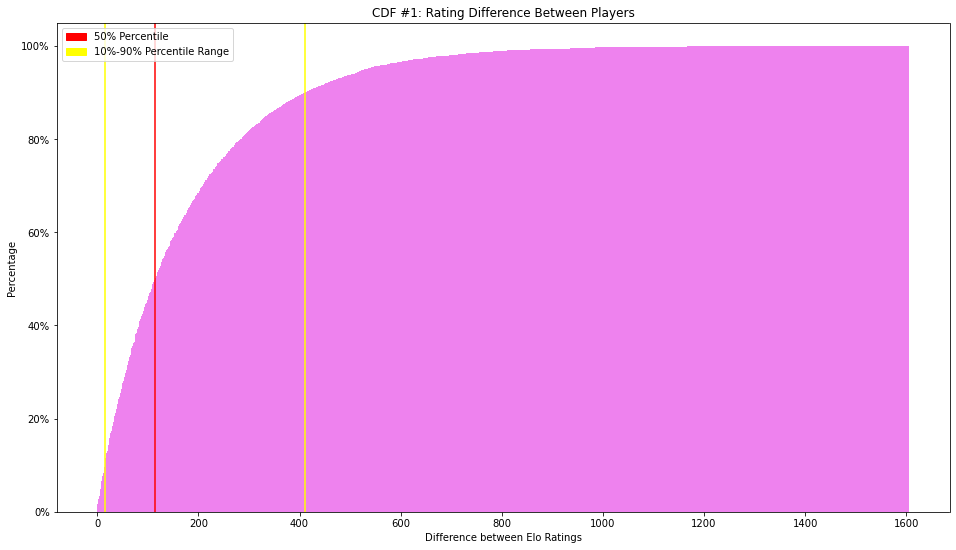

In [16]:
yellow_line = mpatches.Patch(color='red', label='50% Percentile')
red_line = mpatches.Patch(color='yellow', label='10%-90% Percentile Range')

plt.figure(figsize=(16, 9))
plt.hist(df['rate_difference'], bins = 1000, density=True, cumulative=True, color = "violet");
plt.title("CDF #1: Rating Difference Between Players");
plt.xlabel("Difference between Elo Ratings");
plt.ylabel("Percentage");
plt.axvline(cdf_finder(df['rate_difference'], .50), color='r')
plt.axvline(cdf_finder(df['rate_difference'], .10), color='yellow')
plt.axvline(cdf_finder(df['rate_difference'], .90), color='yellow')
plt.legend(handles=[yellow_line, red_line]);
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;

In [17]:
print(" 5%: {} points".format(cdf_finder(df['rate_difference'], .05)))
print("10%: {} points".format(cdf_finder(df['rate_difference'], .10)))
print("50%: {} points".format(cdf_finder(df['rate_difference'], .50)))
print("90%: {} points".format(cdf_finder(df['rate_difference'], .90)))
print("95%: {} points".format(cdf_finder(df['rate_difference'], .95)))

 5%: 7 points
10%: 15 points
50%: 115 points
90%: 411 points
95%: 532 points


In [18]:
a, loc, scale = ss.pareto.fit(df['rate_difference'])

pareto_model = ss.pareto(a,loc,scale).rvs(10000000)

C:\Users\MHotaling144186\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


<ipython-input-19-7b5d5ccfa73f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;


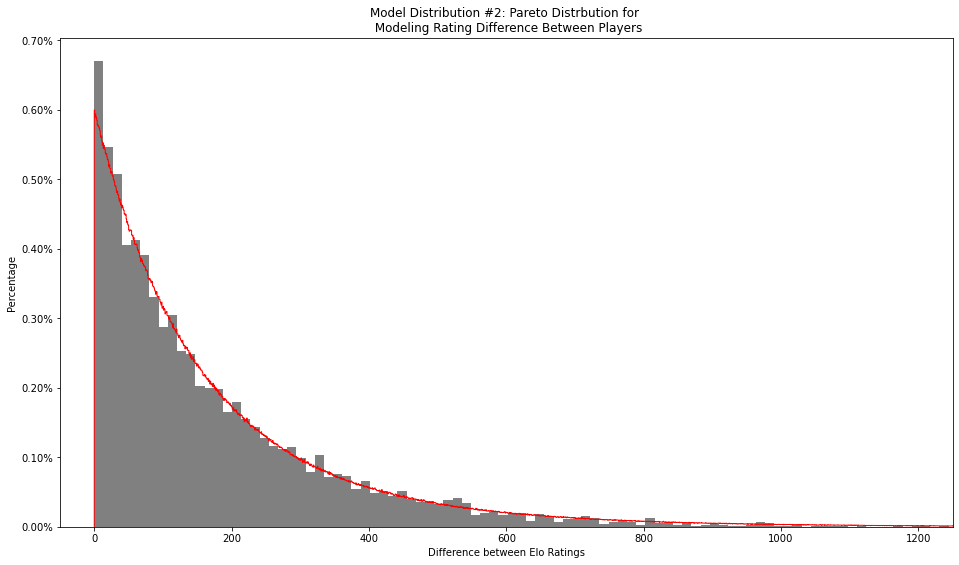

In [19]:
a, loc, scale = ss.pareto.fit(df['rate_difference'])

plt.figure(figsize=(16, 9))
plt.hist(df['rate_difference'], bins = 120, color = "grey", density=True);
plt.hist(pareto_model, bins = 10000, color = "red", density=True, histtype="step");
plt.title("Model Distribution #2: Pareto Distrbution for \n Modeling Rating Difference Between Players");
plt.xlabel("Difference between Elo Ratings");
plt.ylabel("Percentage");
plt.xlim(-50,1250)
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;

In [20]:
print("a : {:.2f}".format(a))
print("loc: {:.2f}".format(loc))
print("scale: {:.2f}".format(scale))


a : 10.34
loc: -1724.22
scale: 1724.17


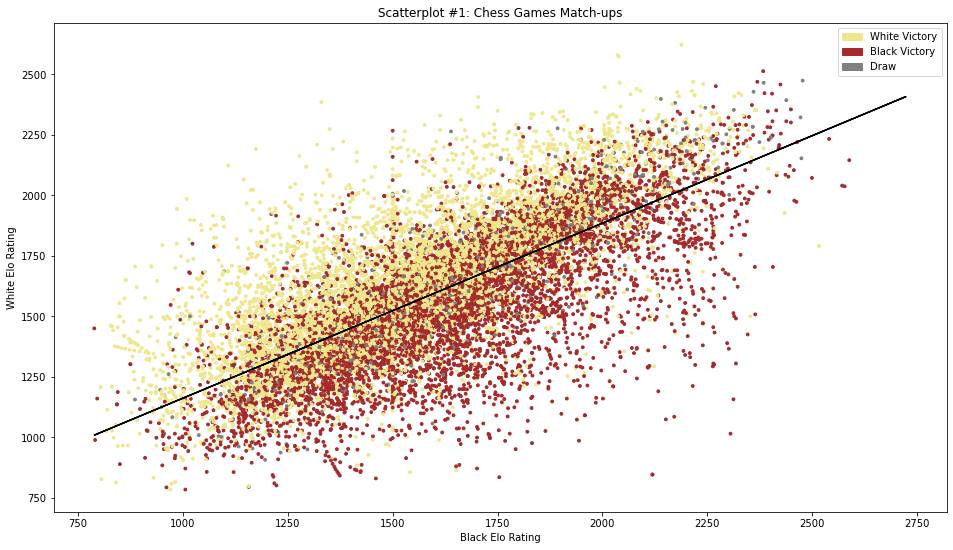

In [21]:
colors = []
for i in dfnew['winner']:
    if i == "black":
        colors.append("brown")
    elif i == "white":
        colors.append("khaki")
    else: 
        colors.append("grey")
colors = np.array(colors)

white_colors = mpatches.Patch(color='khaki', label='White Victory')
black_colors = mpatches.Patch(color='brown', label='Black Victory')
draw_colors = mpatches.Patch(color='grey', label='Draw')


z = np.polyfit(dfnew['white_rating'], dfnew['black_rating'], 1)
p = np.poly1d(z)

plt.figure(figsize=(16, 9))
plt.title("Scatterplot #1: Chess Games Match-ups");
plt.xlabel("Black Elo Rating");
plt.ylabel("White Elo Rating");
plt.plot(df['black_rating'],p(df['black_rating']),"black")
plt.legend(handles=[white_colors, black_colors, draw_colors]);
plt.scatter(x = dfnew['black_rating'], y = dfnew['white_rating'], c = colors, s = 8);

In [22]:
print("Pearson correlation coefficient : {:.2f}".format(ss.pearsonr(dfnew['black_rating'], dfnew['white_rating'])[0]))
print("Covariance : {:.2f}".format(np.cov(dfnew['black_rating'], dfnew['white_rating'])[0,1]))

Pearson correlation coefficient : 0.71
Covariance : 58417.69


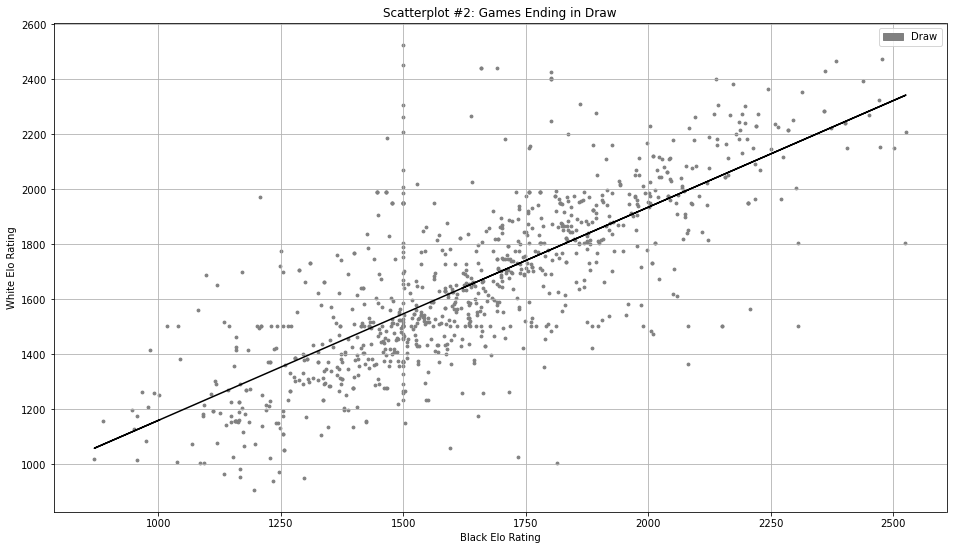

In [23]:
colors = []
for i in df['winner']:
    if i == "black":
        colors.append("brown")
    elif i == "white":
        colors.append("khaki")
    else: 
        colors.append("grey")
colors = np.array(colors)

#white_colors = mpatches.Patch(color='khaki', label='White Victory')
#black_colors = mpatches.Patch(color='brown', label='Black Victory')
draw_colors = mpatches.Patch(color='grey', label='Draw')

temp = df[df['winner'] == "draw"]

z = np.polyfit(temp['black_rating'], temp['white_rating'], 1)
p = np.poly1d(z)

plt.figure(figsize=(16, 9))
plt.title("Scatterplot #2: Games Ending in Draw");
plt.xlabel("Black Elo Rating");
plt.ylabel("White Elo Rating");
plt.plot(temp['black_rating'],p(temp['black_rating']),"black")
plt.legend(handles=[draw_colors]);
plt.grid()
plt.scatter(x = temp['black_rating'], y = temp['white_rating'], c = "grey", s = 8);

In [24]:
print("Pearson correlation coefficient : {:.2f}".format(ss.pearsonr(temp['black_rating'], temp['white_rating'])[0]))
print("Covariance : {:.2f}".format(np.cov(temp['black_rating'], temp['white_rating'])[0,1]))

Pearson correlation coefficient : 0.76
Covariance : 71539.25


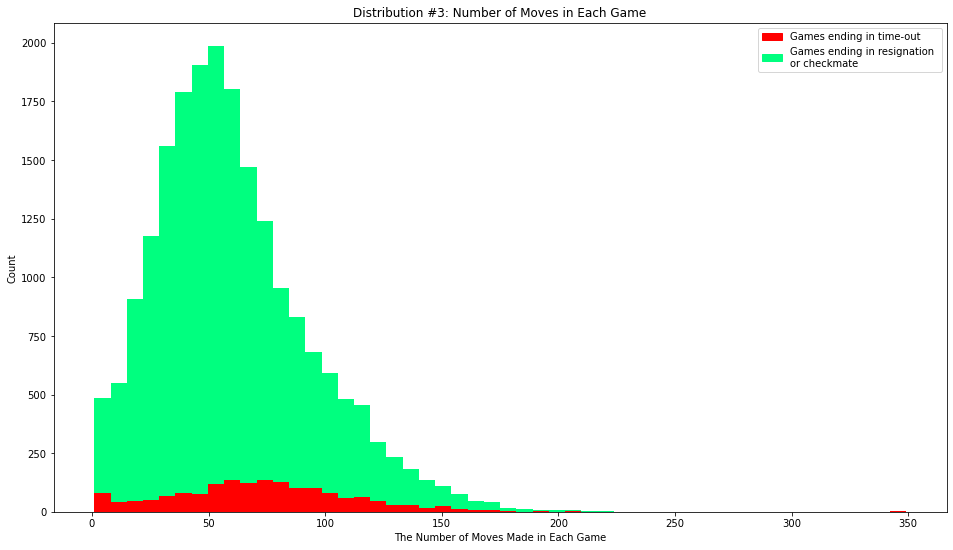

In [25]:
total_moves = []

for i in df['moves']:
    length = i.split(" ")
    total_moves.append(len(length))
    
    
timeouts = []
checkmates = []
draws = []

for i,j in zip(df['victory_status'], df['moves']):
    if i == "outoftime":
        timeouts.append(len(j.split(" ")))
        


red_patch = mpatches.Patch(color='red', label='Games ending in time-out')
green_patch = mpatches.Patch(color='springgreen', label='Games ending in resignation \nor checkmate')


plt.figure(figsize=(16, 9))
plt.hist(total_moves, bins = 50, color ="springgreen");
plt.hist(timeouts, bins = 50, color ="red");
plt.title("Number of Moves for Each Game");
plt.title("Distribution #3: Number of Moves in Each Game");
plt.xlabel("The Number of Moves Made in Each Game");
plt.ylabel("Count");
plt.legend(handles=[red_patch, green_patch]);
plt.plot();

In [26]:
print("Mean Number of Moves: {:.2f} moves".format(np.mean(df['turns'])))
print("Median Number of Moves: {} moves".format(np.median(df['turns'])))
print("Mode Number of Moves: {} moves".format(int(ss.mode(df['turns'])[0])))
print("Skew of Moves: {:.2f}".format(float(ss.skew(df['turns']))))
print("Kurtosis of Moves: {:.2f}".format(float(ss.kurtosis(df['turns']))))

Mean Number of Moves: 60.47 moves
Median Number of Moves: 55.0 moves
Mode Number of Moves: 53 moves
Skew of Moves: 0.90
Kurtosis of Moves: 1.38


<ipython-input-27-bf1422dde4e0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()])


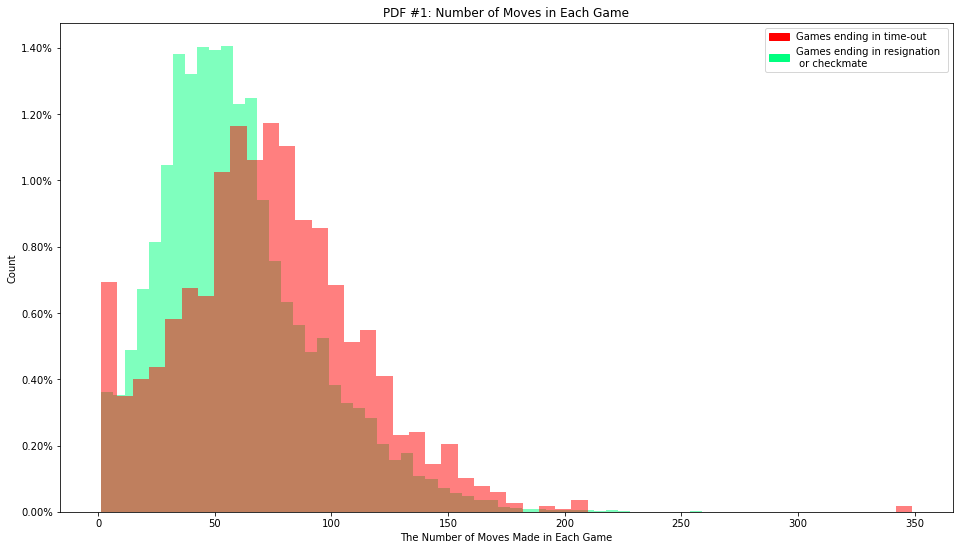

In [27]:
red_patch = mpatches.Patch(color='red', label='Games ending in time-out')
green_patch = mpatches.Patch(color='springgreen', label='Games ending in resignation \n or checkmate')

plt.figure(figsize=(16, 9))
plt.hist(df[df['victory_status'] != "outoftime"]['turns'], bins = 50, color ="springgreen",alpha = 0.5, density=True);
plt.hist(df[df['victory_status'] == "outoftime"]['turns'], bins = 50, color ="red",alpha = 0.5, density=True);
plt.title("Number of Moves for Each Game");
plt.title("PDF #1: Number of Moves in Each Game");
plt.xlabel("The Number of Moves Made in Each Game");
plt.ylabel("Count");
plt.legend(handles=[red_patch, green_patch]);
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.plot();

<ipython-input-28-3f067eaa2e1b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()])


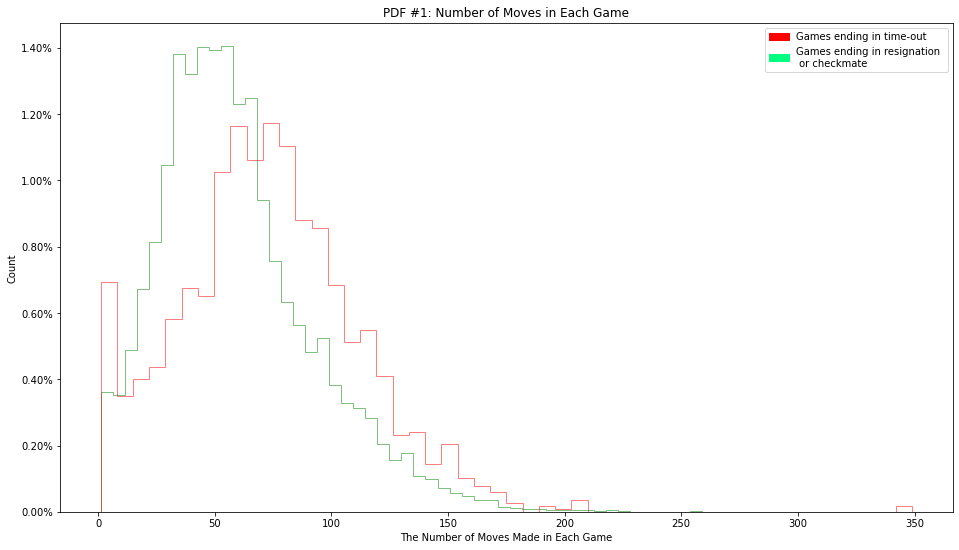

In [28]:
plt.figure(figsize=(16, 9))
plt.hist(df[df['victory_status'] != "outoftime"]['turns'], bins = 50, color ="green",alpha = 0.5, density=True, histtype="step");
plt.hist(df[df['victory_status'] == "outoftime"]['turns'], bins = 50, color ="red",alpha = 0.5, density=True, histtype="step");
plt.title("Number of Moves for Each Game");
plt.title("PDF #1: Number of Moves in Each Game");
plt.xlabel("The Number of Moves Made in Each Game");
plt.ylabel("Count");
plt.legend(handles=[red_patch, green_patch]);
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.plot();

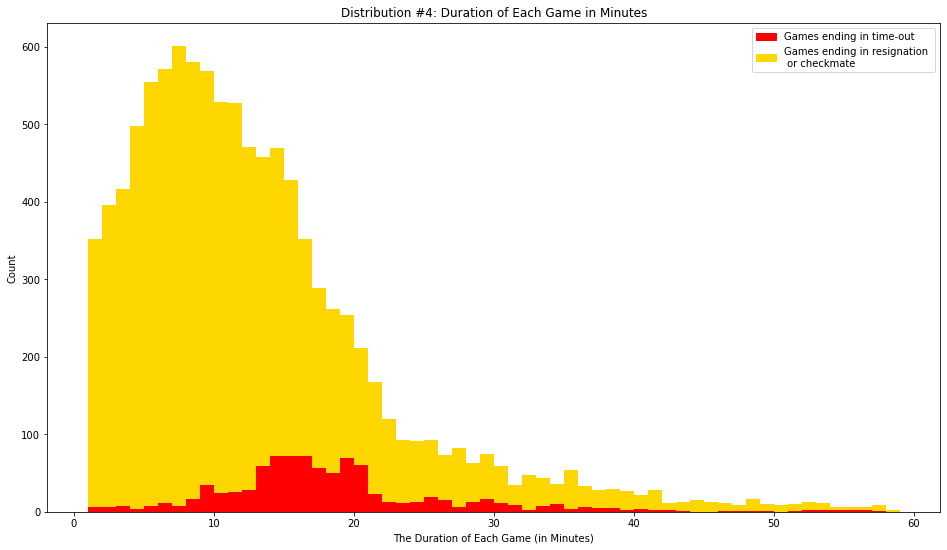

In [29]:
df['game_timer'] = df['increment_code'].str.split("+",expand = True)[0].astype(int)
df['increment_time'] = df['increment_code'].str.split("+",expand = True)[1].astype(int)
df['total_game_time'] = df['game_timer'] + (df['increment_time'] * df['turns'])/60

df['game_length'] = df['last_move_at']/1000 - df['created_at']/1000
temp = df[df['game_length'] != 0]


red_patch = mpatches.Patch(color='red', label='Games ending in time-out')
yellow_patch = mpatches.Patch(color='gold', label='Games ending in resignation \n or checkmate')

total_moves = []

temp = temp[temp['game_length'] != 10000]

for i in df['moves']:
    length = i.split(" ")
    total_moves.append(len(length))
    
    
timeouts = []
timeout_moves = []

for i,j,k in zip(temp['victory_status'], temp['game_length'], temp['turns']):
    if i == "outoftime":
        timeouts.append(j)
        timeout_moves.append(k)


plt.figure(figsize=(16, 9))
plt.hist(temp['game_length']/60, bins = np.arange(1,60,1), color = "gold");
plt.hist(np.array(timeouts)/60, bins = np.arange(1,60,1), color = "red");
plt.title("Number of Moves for Each Game");
plt.title("Distribution #4: Duration of Each Game in Minutes");
plt.xlabel("The Duration of Each Game (in Minutes)");
plt.ylabel("Count");
plt.legend(handles=[red_patch, yellow_patch]);
plt.plot();

In [30]:
print("Mean Game Duration: {:.2f} minutes".format(np.mean(temp['game_length']/60)))
print("Median Game Duration: {:.2f} minutes".format(np.median(temp['game_length']/60)))
print("Mode Game Duration: {} minutes".format(int(ss.mode(temp['game_length']/60)[0])))
print("Skew of Game Duration: {:.2f}".format(float(ss.skew(temp['game_length']/60))))
print("Kurtosis of Game Duration: {:.2f}".format(float(ss.kurtosis(temp['game_length']/60))))

Mean Game Duration: 15.63 minutes
Median Game Duration: 11.02 minutes
Mode Game Duration: 0 minutes
Skew of Game Duration: 92.57
Kurtosis of Game Duration: 9154.83


<ipython-input-31-e0a457ca6e92>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


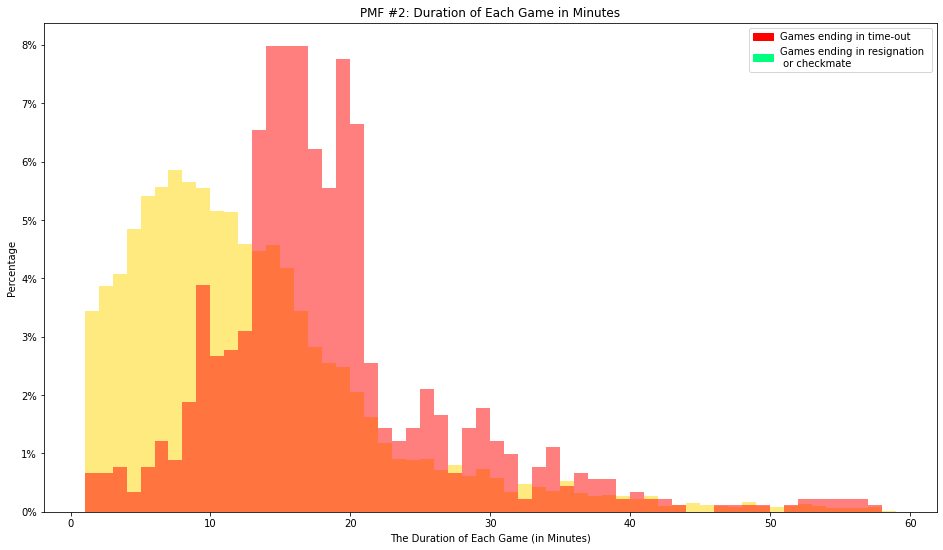

In [31]:
plt.figure(figsize=(16, 9))
plt.hist(temp['game_length']/60, bins = np.arange(1,60,1), color = "gold",alpha = 0.5, density=True);
plt.hist(np.array(timeouts)/60, bins = np.arange(1,60,1), color = "red",alpha = 0.5, density=True);
plt.title("Number of Moves for Each Game");
plt.title("PMF #2: Duration of Each Game in Minutes");
plt.xlabel("The Duration of Each Game (in Minutes)");
plt.ylabel("Percentage");
plt.legend(handles=[red_patch, green_patch]);
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.plot();

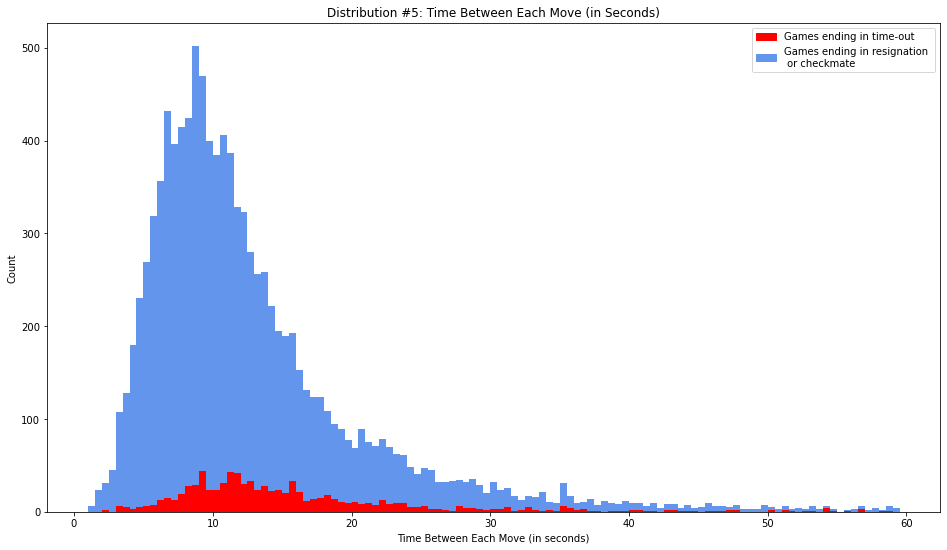

In [32]:
red_patch = mpatches.Patch(color='red', label='Games ending in time-out')
blue_patch = mpatches.Patch(color='cornflowerblue', label='Games ending in resignation \n or checkmate')


plt.figure(figsize=(16, 9))
plt.hist(temp['game_length']/temp['turns'], bins = np.arange(1,60,0.5), color = "cornflowerblue");
plt.hist(np.array(timeouts)/np.array(timeout_moves), bins = np.arange(1,60,0.5), color = "red" );
plt.title("Number of Moves for Each Game");
plt.title("Distribution #5: Time Between Each Move (in Seconds)");
plt.xlabel("Time Between Each Move (in seconds)");

plt.legend(handles=[red_patch, blue_patch]);
plt.ylabel("Count");

In [33]:
print("Mean Time Between Each Move: {:.2f} seconds".format(np.mean(temp['game_length']/temp['turns'])))
print("Median Time Between Each Move: {:.2f} seconds".format(np.median(temp['game_length']/temp['turns'])))
print("Mode Time Between Each Move: {:.2f} seconds".format(float(ss.mode(temp['game_length']/temp['turns'])[0])))
print("Skew of Time Between Each Move: {:.2f}".format(float(ss.skew(temp['game_length']/temp['turns']))))
print("Kurtosis of Time Between Each Move: {:.2f}".format(float(ss.kurtosis(temp['game_length']/temp['turns']))))

Mean Time Between Each Move: 25.43 seconds
Median Time Between Each Move: 10.83 seconds
Mode Time Between Each Move: 2.59 seconds
Skew of Time Between Each Move: 67.06
Kurtosis of Time Between Each Move: 4715.68


<ipython-input-34-99f3e8406850>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


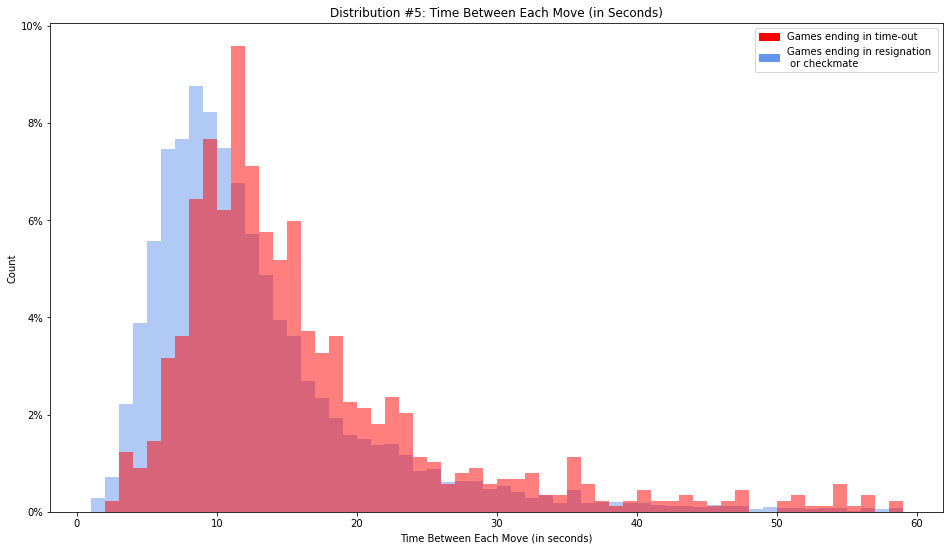

In [34]:
plt.figure(figsize=(16, 9))
plt.hist(temp['game_length']/temp['turns'], bins = np.arange(1,60,1), color = "cornflowerblue",alpha = 0.5, density=True);
plt.hist(np.array(timeouts)/np.array(timeout_moves), bins = np.arange(1,60,1), color = "red",alpha = 0.5, density=True );
plt.title("Number of Moves for Each Game");
plt.title("Distribution #5: Time Between Each Move (in Seconds)");
plt.xlabel("Time Between Each Move (in seconds)");
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(handles=[red_patch, blue_patch]);
plt.ylabel("Count");

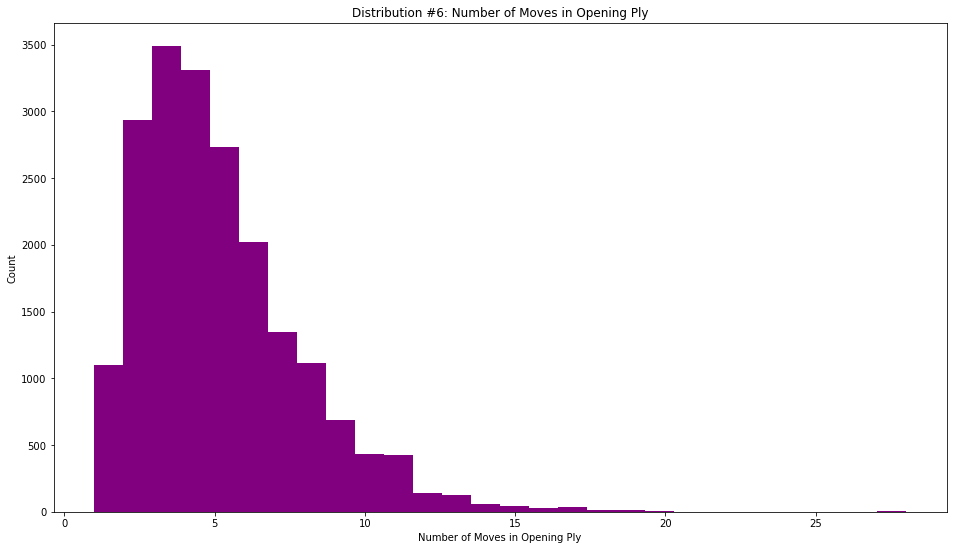

In [35]:

plt.figure(figsize=(16, 9))
plt.hist(df['opening_ply'], bins = max(df['opening_ply']), color = "purple");
plt.title("Number of Moves for Each Game");
plt.title("Distribution #6: Number of Moves in Opening Ply");
plt.xlabel("Number of Moves in Opening Ply");
plt.ylabel("Count");

In [36]:
print("Mean Opening Ply : {:.2f} moves".format(np.mean(df['opening_ply'])))
print("Median Opening Ply: {:.2f} moves".format(np.median(df['opening_ply'])))
print("Mode Opening Ply: {} moves".format(int(ss.mode(df['opening_ply'])[0])))
print("Skew of Opening Ply: {:.2f}".format(float(ss.skew(df['opening_ply']))))
print("Kurtosis of Opening Ply: {:.2f}".format(float(ss.kurtosis(df['opening_ply']))))

Mean Opening Ply : 4.82 moves
Median Opening Ply: 4.00 moves
Mode Opening Ply: 3 moves
Skew of Opening Ply: 1.33
Kurtosis of Opening Ply: 3.09


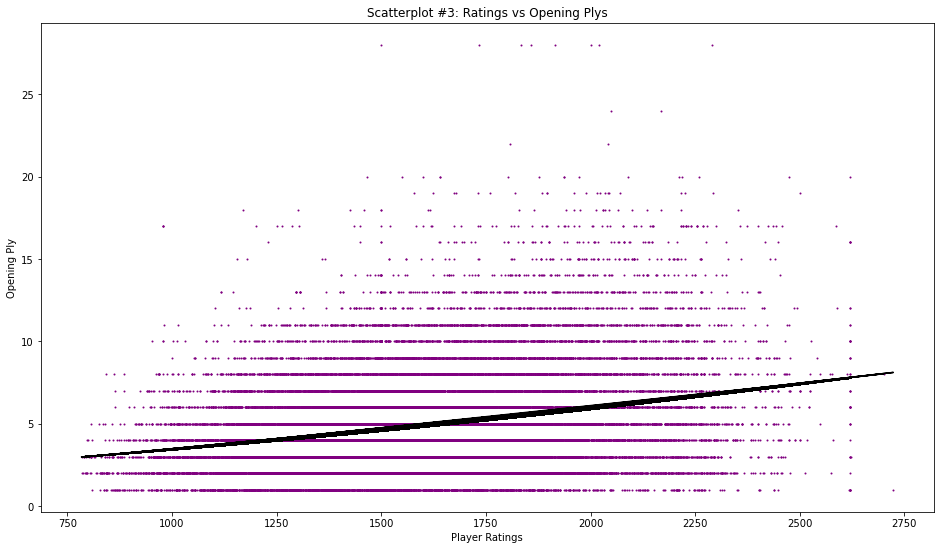

In [37]:
elos = []
moves = []

def rand_jitter(arr):
    stdev = .00 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

for i,j,k in zip(df['white_rating'], df['black_rating'], df['opening_ply']):
    elos.append(i)
    elos.append(j)
    moves.append(k)
    moves.append(k)


z = np.polyfit(elos, moves, 2)
p = np.poly1d(z)
    

plt.figure(figsize=(16, 9))
plt.title("Scatterplot #3: Ratings vs Opening Plys");
plt.xlabel("Player Ratings");
plt.ylabel("Opening Ply");
plt.plot(elos,p(elos),"black")
plt.scatter(elos, rand_jitter(moves), s = 1, color = "purple");

In [38]:
print("Pearson correlation coefficient : {:.2f}".format(ss.pearsonr(elos,moves)[0]))
print("Covariance : {:.2f}".format(np.cov(elos,moves)[0,1]))

Pearson correlation coefficient : 0.27
Covariance : 216.94


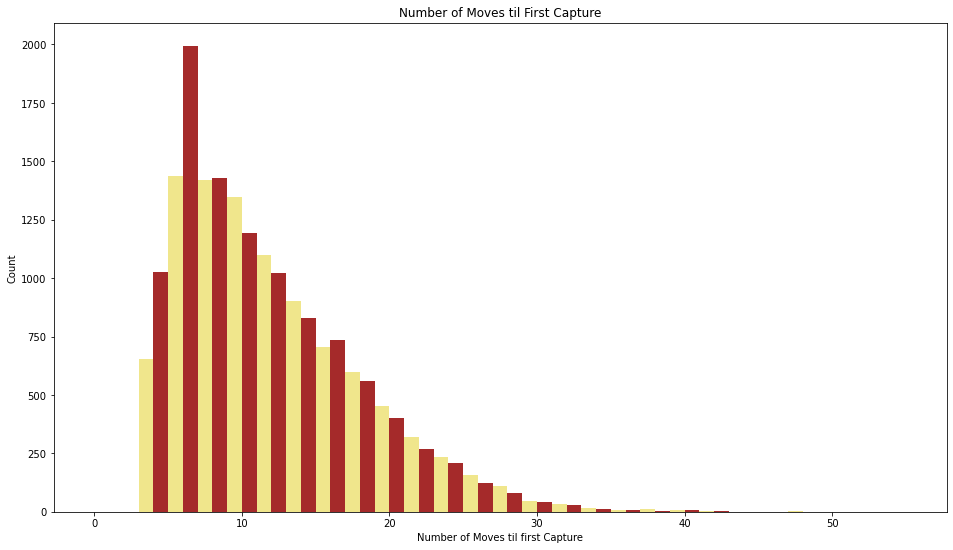

In [186]:
moves_to_cap = []

for i in df['moves']:
    if not "x" in i:
        moves_to_cap.append(np.nan)
    else:
        x = 0
        moves = i.split(" ")
        for j in moves:
            x += 1
            if "x" in j:
                break
        moves_to_cap.append(x)

df['movestilfirstcapture'] = moves_to_cap

white_cap = []
black_cap = []

for i in df['movestilfirstcapture']:
    if i == np.nan:
        pass
    elif i % 2 == 1:
        white_cap.append(i)
    else:
        black_cap.append(i)
        
plt.figure(figsize=(16, 9))
plt.hist(white_cap,bins = np.linspace(0,55,56), color = "khaki");
plt.hist(black_cap,bins = np.linspace(0,55,56), color = "brown");
plt.title("Number of Moves til First Capture")
plt.xlabel("Number of Moves til first Capture")
plt.ylabel("Count");

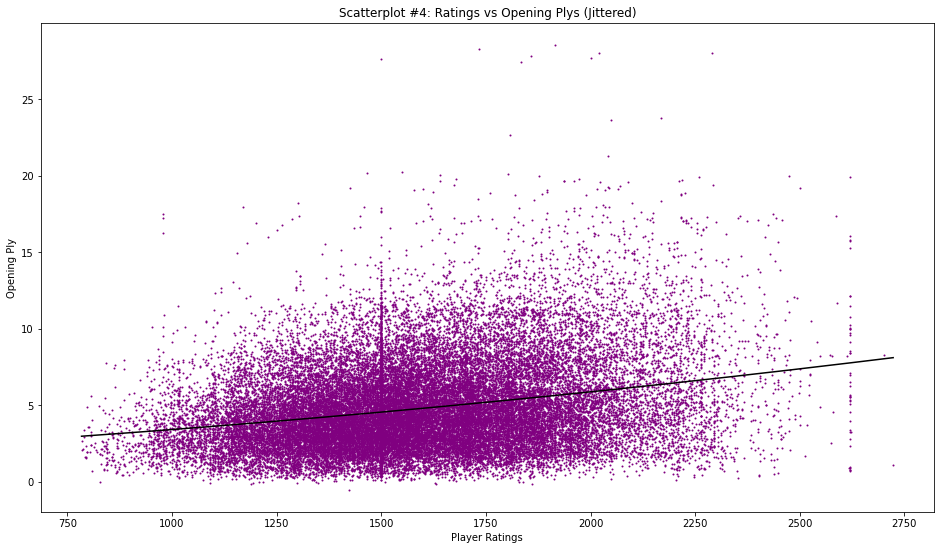

In [39]:
elos = []
moves = []

def rand_jitter(arr):
    stdev = .015 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

for i,j,k in zip(df['white_rating'], df['black_rating'], df['opening_ply']):
    elos.append(i)
    elos.append(j)
    moves.append(k)
    moves.append(k)


z = np.polyfit(elos, moves, 2)
p = np.poly1d(z)
    

plt.figure(figsize=(16, 9))
plt.title("Scatterplot #4: Ratings vs Opening Plys (Jittered)");
plt.xlabel("Player Ratings");
plt.ylabel("Opening Ply");
plt.plot(np.sort(elos),np.sort(p(elos)),"black")
plt.scatter(elos, rand_jitter(moves), s = 1, color = "purple");

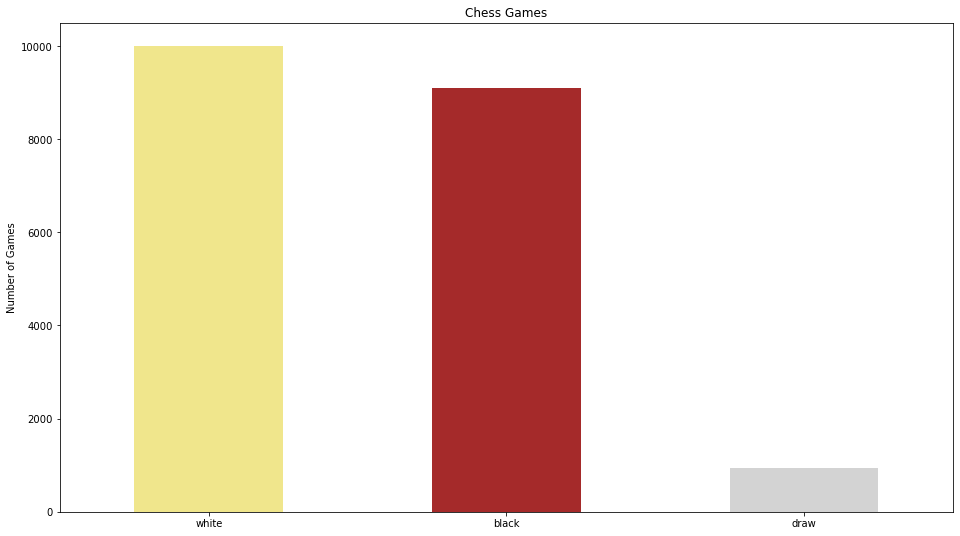

In [40]:
plt.figure(figsize=(16, 9))
df['winner'].value_counts().plot(kind="bar", color = ["khaki","brown","lightgrey"]);
plt.xticks(rotation = 0)
plt.title("Chess Games")
plt.ylabel("Number of Games");

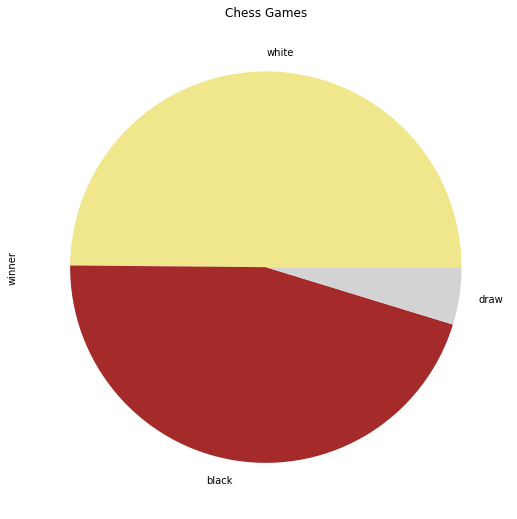

In [41]:
plt.figure(figsize=(16, 9))
df['winner'].value_counts().plot(kind="pie", colors = ["khaki","brown","lightgrey"]);
plt.title("Chess Games");

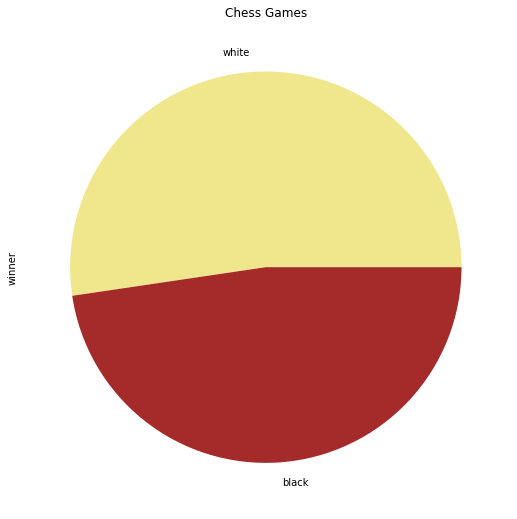

In [42]:
plt.figure(figsize=(16, 9))
df[df['winner'] != "draw"]['winner'].value_counts().plot(kind="pie", colors = ["khaki","brown","lightgrey"]);
plt.title("Chess Games");

In [43]:
df['first_move'] = df["moves"].str.split(" ", 1, expand=True)[0]

In [44]:
first_moves = {}

for i in df["first_move"]:
    if i in first_moves:
        first_moves[i] += 1
    else:
        first_moves[i] = 1

In [45]:
df['simplified_opening'] = df['opening_name'].map(lambda n: n.split("|")[0].split(":")[0])

openings = {}

for i in df["simplified_opening"]:
    if i in openings:
        openings[i] += 1
    else:
        openings[i] = 1

opening_name_list = []
num_of_openings_list = []
white_wins_list = []
black_wins_list = []
game_draws_list = []
white_win_rate_list = []
black_win_rate_list = []
draw_rate_list = []
        
for i,j in sorted(openings.items(), key=lambda kv: kv[1], reverse=True):
    temp = df[df['simplified_opening'] == i]
    white_wins = temp[temp['winner'] == "white"]
    black_wins = temp[temp['winner'] == "black"]
    draws = temp[temp['winner'] == "draw"]
    
    opening_name_list.append(i)
    num_of_openings_list.append(j)
    white_wins_list.append(len(white_wins))
    black_wins_list.append(len(black_wins))
    game_draws_list.append(len(draws))
    white_win_rate_list.append((len(white_wins) + (len(draws) * 0.5))/len(temp))
    black_win_rate_list.append((len(black_wins) + (len(draws) * 0.5))/len(temp))
    draw_rate_list.append(len(draws)/len(temp))
    
dataframe_dict = {'Opening Name': opening_name_list, 
                  'Number of Openings': num_of_openings_list, 
                  'White Wins': white_wins_list,
                  'Black Wins': black_wins_list,
                  'Draws': game_draws_list,
                  'White Win Rate': white_win_rate_list,
                  'Black Win Rate': black_win_rate_list,
                  'Draw Rate': draw_rate_list}


openings_and_results_df = pd.DataFrame(dataframe_dict) 


In [46]:
def move_analyzer(my_moves):
    engine = chess.engine.SimpleEngine.popen_uci("stockfish.exe")
    engine.options["Hash"]
    engine.configure({"Hash": 32})

    blunder_threshold = 2
    inaccuracy_threshold = 0.3

    board = chess.Board()

    scores = []
    old_score = 0
    x = 0
    for i in my_moves.split(" "):
        board.push_san(i)
        clear_output(wait=True)
        print(board)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        if x % 2 != 0:
            try:
                black_score = (1 * int(str(info['score']))/ 100)
            except:
                pass
            #print("Black Move", black_score)
            #if black_score - old_score > blunder_threshold:
            #    print("BLUNDER!")
            #if black_score - old_score > inaccuracy_threshold:
            #    print("Inaccuracy")
            scores.append(black_score)
            old_score = black_score
        else:
            try:
                white_score = (-1 * int(str(info['score']))/ 100) 
            except:
                pass
            #print("White Move", white_score)
            # if white_score - old_score < -blunder_threshold:
            #    print("BLUNDER!")
            #if white_score - old_score < -inaccuracy_threshold:
            #    print("Inaccuracy")
            old_score = white_score
            scores.append(white_score)
        x += 1
    return scores

In [203]:
my_moves = move_analyzer(df['moves'].iloc[655])

. . . . r . k .
p . . . . p . p
q . p . . . . P
. . . p . b p .
. . . P . . . .
. Q . . r P . .
P . . . . K P .
. . R . . . . R


e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 Nf3 Nc6 Bb5 Qa5+ Nc3 Nxc3 Bxc6+ bxc6 bxc3 Qxc3+ Bd2 Qd3 exd6 exd6 Qa4 Qa6 Qc2 Be7 Rc1 Bd7 Ng5 Bxg5 Bxg5 O-O Qb3 Rae8+ Be3 d5 h4 Bf5 h5 Re7 h6 g5 f3 Rfe8 Kf2 Rxe3


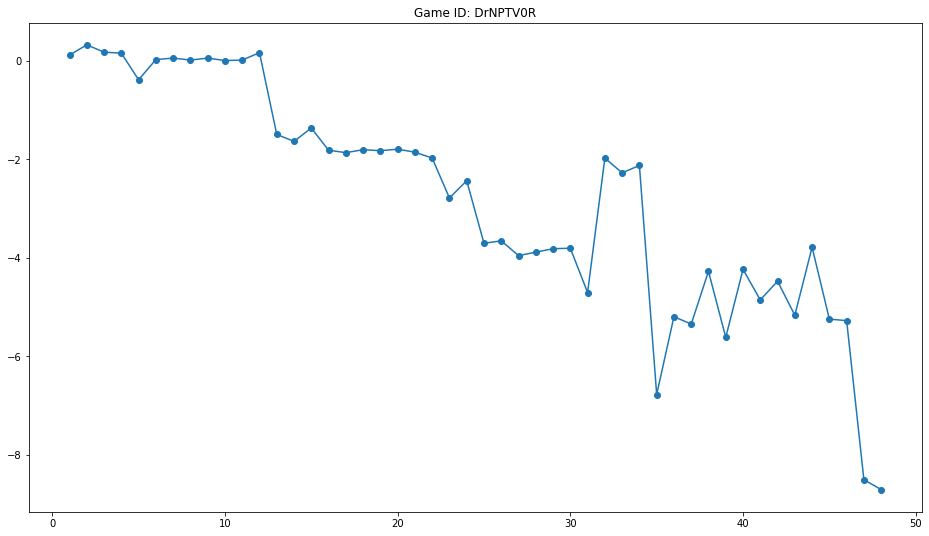

In [207]:
print(df['moves'].iloc[655])
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1,len(my_moves) + 1), my_moves);
plt.scatter(np.arange(1, len(my_moves) + 1),y = my_moves);
plt.title("Game ID: {}".format(df['id'].iloc[655]));

In [49]:
bongcloud_attack = "e4 e5 Ke2 Nf6 d3 d5 Nd2 Nc6 c3 b6 Qc2 Bb7 Ngf3 Qd7 b4 O-O-O a3 Kb8 Bb2 g6 Ke1 Bh6 Rd1 Rhe8 Be2 Nh5 b5 Na5 c4 Nf4 Bf1 dxc4 dxc4 f5 c5 fxe4 c6 Nxc6 bxc6 Bxc6 Nxe5 Nd3+ Bxd3 exd3 Qc4 Bxg2 Rg1 Bb7 Qh4 Qf5 Qxh6 Rxe5+ Bxe5 Qxe5+ Qe3 Qxh2 Kf1 Qh5 f3 Bc6 Qg5 Qh3+ Kf2 Qh2+ Rg2 Qd6 Re1 Rf8 Kg1 Rf5 Qe7 Qf4 Qd8+ Kb7 Qxd3 Rd5 Qe3 Qh4 Qf2 Qa4 Re3 Qd1+ Qe1 Qa4 Rc3 Rh5 Rg4 Qa5 Qc1 Qe5 Nf1 Qe6 Rgc4 Bb5 Rxc7+ Ka6 a4 Be2 Re3 Rg5+ Kf2 Qh3 Kxe2"
my_moves2 = move_analyzer(bongcloud_attack)

. . . . . . . .
p . R . . . . p
k p . . . . p .
. . . . . . r .
P . . . . . . .
. . . . R P . q
. . . . K . . .
. . Q . . N . .


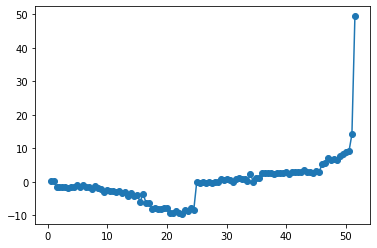

In [50]:
plt.plot(np.arange(1,len(my_moves2) + 1)/2, my_moves2)
plt.scatter(np.arange(1,len(my_moves2) + 1)/2, my_moves2);

In [51]:
df['first_move'] = df["moves"].str.split(" ", 1, expand=True)[0]
df['second_move'] = first_move = df["moves"].str.split(" ", 2, expand=True)[1]

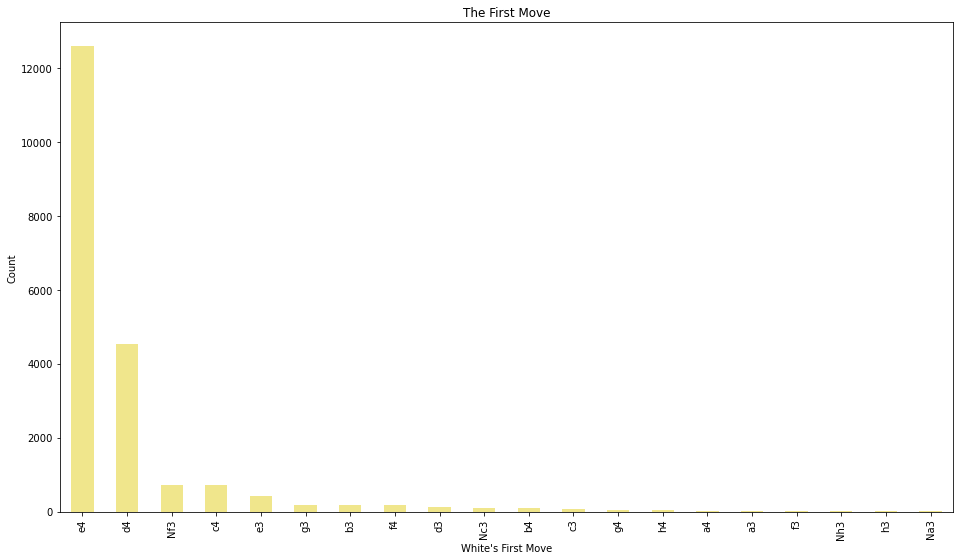

In [52]:
plt.figure(figsize=(16, 9))
df['first_move'].value_counts().sort_values(ascending=False).plot(kind = "bar",color = "khaki" );
plt.title("The First Move")
plt.xlabel("White's First Move")
plt.ylabel("Count");

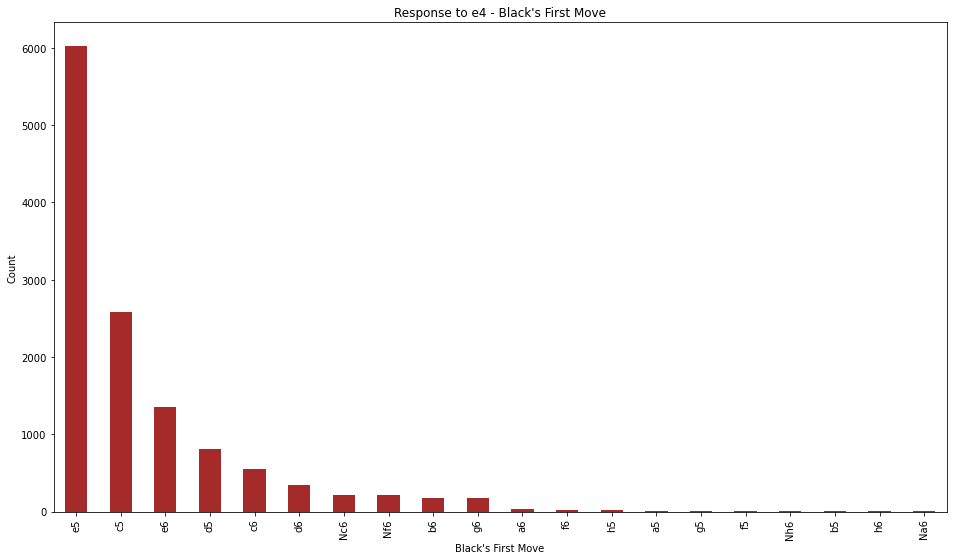

In [53]:
plt.figure(figsize=(16, 9))
df[df['first_move'] == "e4"]['second_move'].value_counts().sort_values(ascending=False).plot(kind = "bar",color = "brown" );
plt.title("Response to e4 - Black's First Move")
plt.xlabel("Black's First Move")
plt.ylabel("Count");

<ipython-input-54-da82782527df>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);


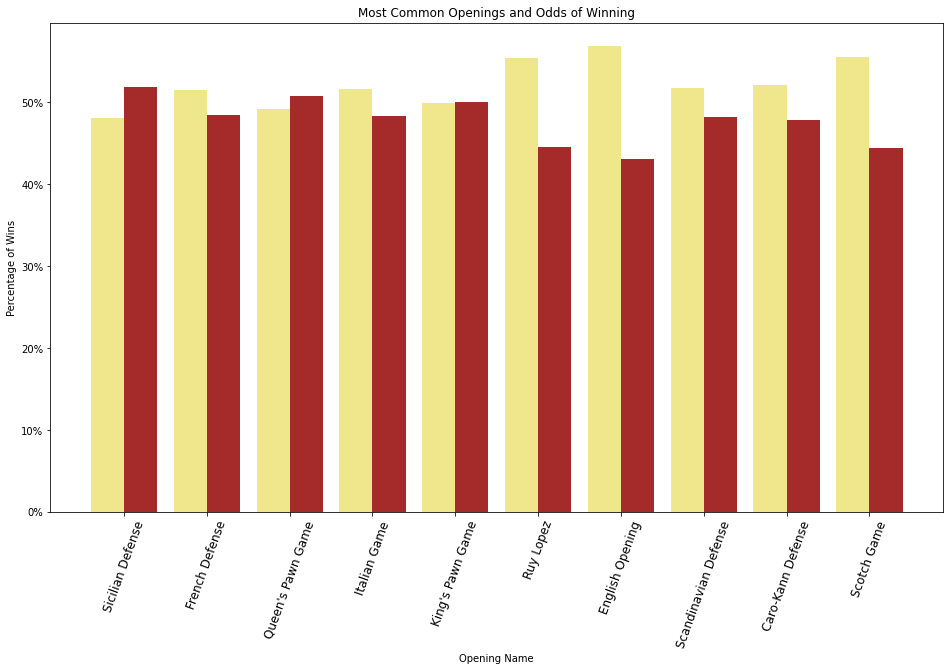

In [54]:
plt.figure(figsize=(16, 9))
plt.bar(x = openings_and_results_df['Opening Name'].head(10), 
        height = openings_and_results_df['White Win Rate'].head(10), 
        align = "edge", 
        width = -0.4, 
        color = "khaki")
plt.bar(x = openings_and_results_df['Opening Name'].head(10), 
        height = openings_and_results_df['Black Win Rate'].head(10), 
        align = "edge", 
        width = 0.4, 
        color = "brown")
plt.xticks(fontsize=12, rotation=70);
plt.title("Most Common Openings and Odds of Winning")
plt.ylabel("Percentage of Wins")
plt.xlabel("Opening Name");
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);

All Games: White Advantage
Chi-squared test statistic: 41.83
Chi-squared p-value: 9.970170756026606e-11

white    10001
black     9107
Name: winner, dtype: int64


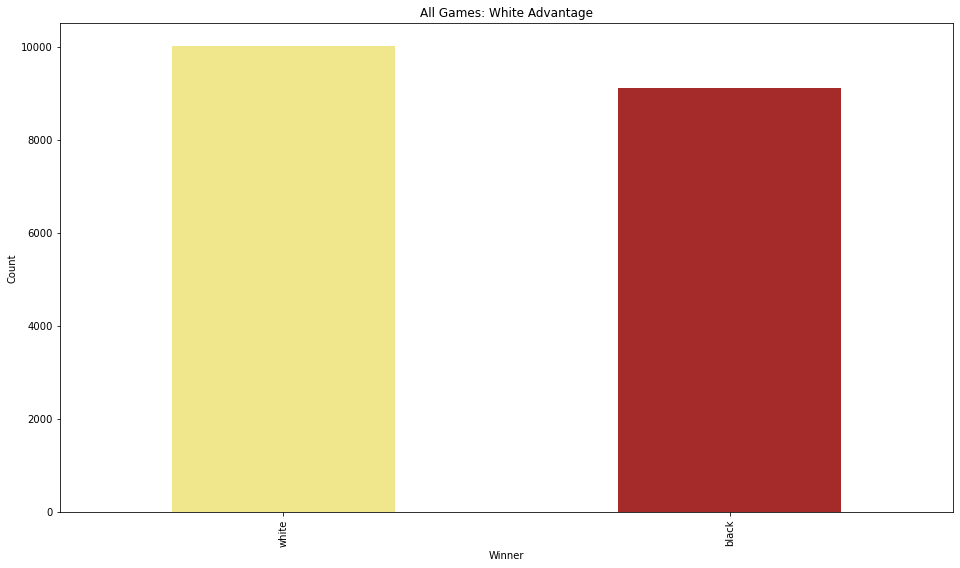

In [55]:
plt.figure(figsize=(16, 9))
df[df['winner'] != "draw"]["winner"].value_counts().sort_index(ascending=False).plot(kind = "bar", color = ['khaki',"brown"])
plt.title("All Games: White Advantage")
plt.xlabel("Winner")
plt.ylabel("Count")

stat, pval = ss.chisquare(df[df['winner'] != "draw"]["winner"].value_counts())
print("All Games: White Advantage")
print("Chi-squared test statistic: {:.2f}".format(stat))
print("Chi-squared p-value: {}".format(pval))
print()
print(df[df['winner'] != "draw"]["winner"].value_counts())

In [56]:
test = df[df['simplified_opening'] == "Sicilian Defense"]
stat, pval = ss.chisquare(test[test['winner'] != "draw"]["winner"].value_counts())

Sicilian Defense: Black Advantage
Chi-squared test statistic: 4.09
Chi-squared p-value: 0.04318086252257314

black    1273
white    1173
Name: winner, dtype: int64


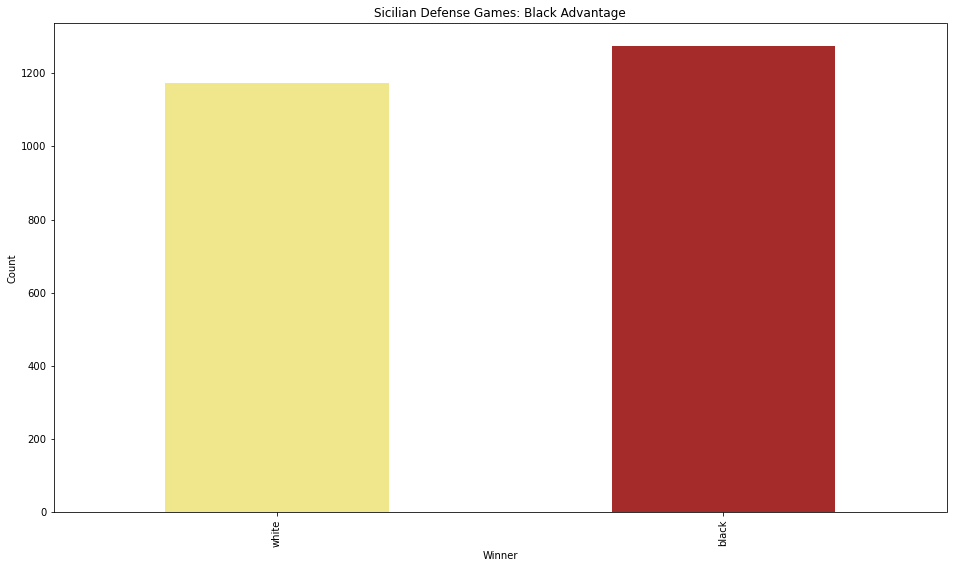

In [57]:
plt.figure(figsize=(16, 9))
test[test['winner'] != "draw"]["winner"].value_counts().sort_index(ascending=False).plot(kind = "bar", color = ['khaki',"brown"])
plt.title("Sicilian Defense Games: Black Advantage")
plt.xlabel("Winner")
plt.ylabel("Count")


print("Sicilian Defense: Black Advantage")
print("Chi-squared test statistic: {:.2f}".format(stat))
print("Chi-squared p-value: {}".format(pval))
print()
print(test[test['winner'] != "draw"]["winner"].value_counts())

In [58]:
test = df[df['simplified_opening'] == "Queen's Pawn Game"]
test[test['winner'] != "draw"]["winner"].value_counts()


black    513
white    497
Name: winner, dtype: int64

In [59]:
stat, pval = ss.chisquare(test[test['winner'] != "draw"]["winner"].value_counts())

Queens Pawn Game: Insignificant Results
Chi-squared test statistic: 0.25
Chi-squared p-value: 0.6146455212779469

black    513
white    497
Name: winner, dtype: int64


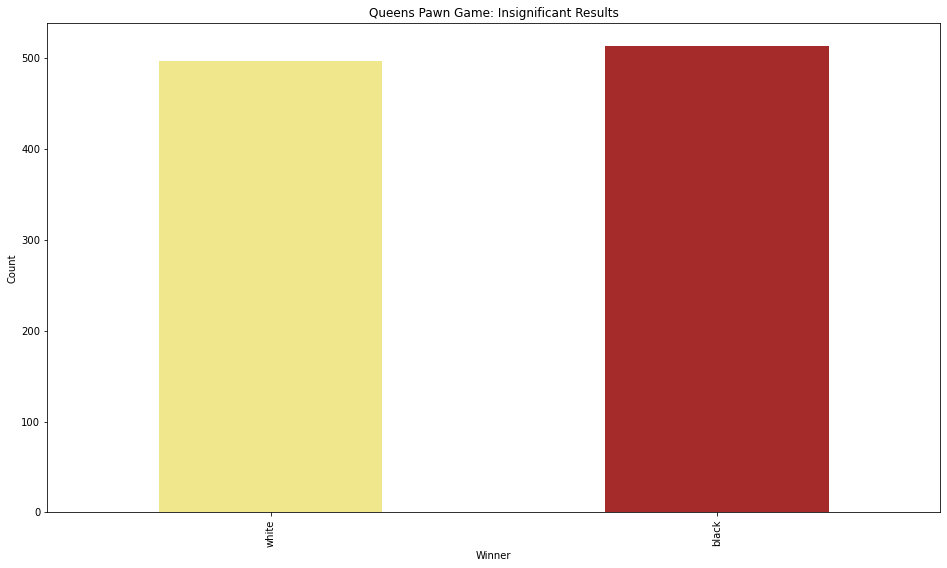

In [60]:
plt.figure(figsize=(16, 9))
test[test['winner'] != "draw"]["winner"].value_counts().sort_index(ascending=False).plot(kind = "bar", color = ['khaki',"brown"])
plt.title("Queens Pawn Game: Insignificant Results")
plt.xlabel("Winner")
plt.ylabel("Count")

print("Queens Pawn Game: Insignificant Results")
print("Chi-squared test statistic: {:.2f}".format(stat))
print("Chi-squared p-value: {}".format(pval))
print()
print(test[test['winner'] != "draw"]["winner"].value_counts())


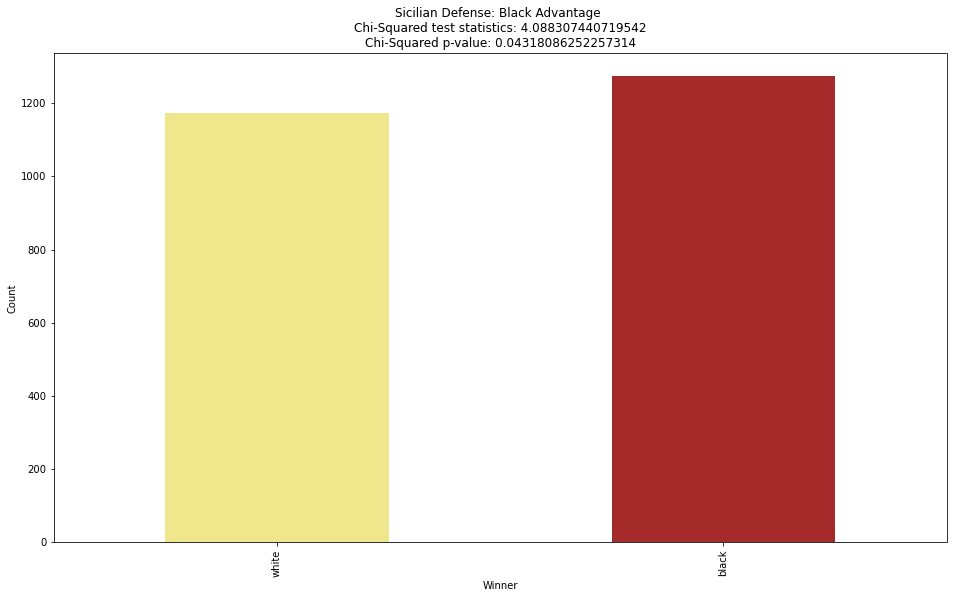

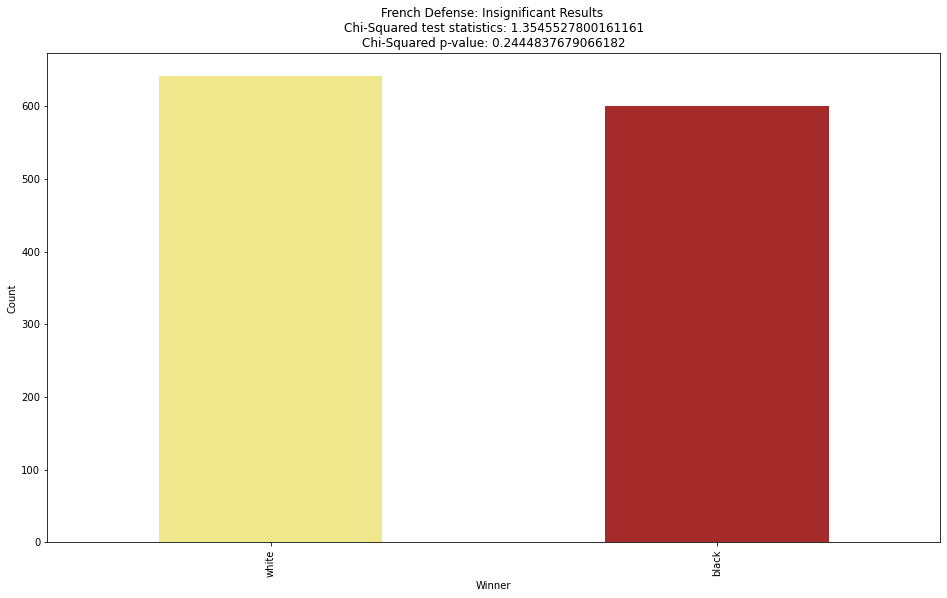

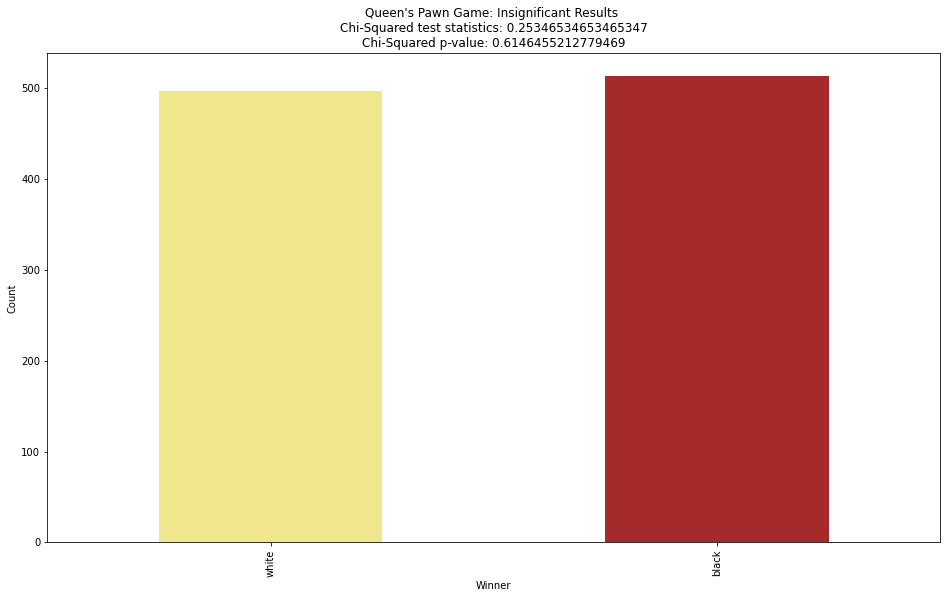

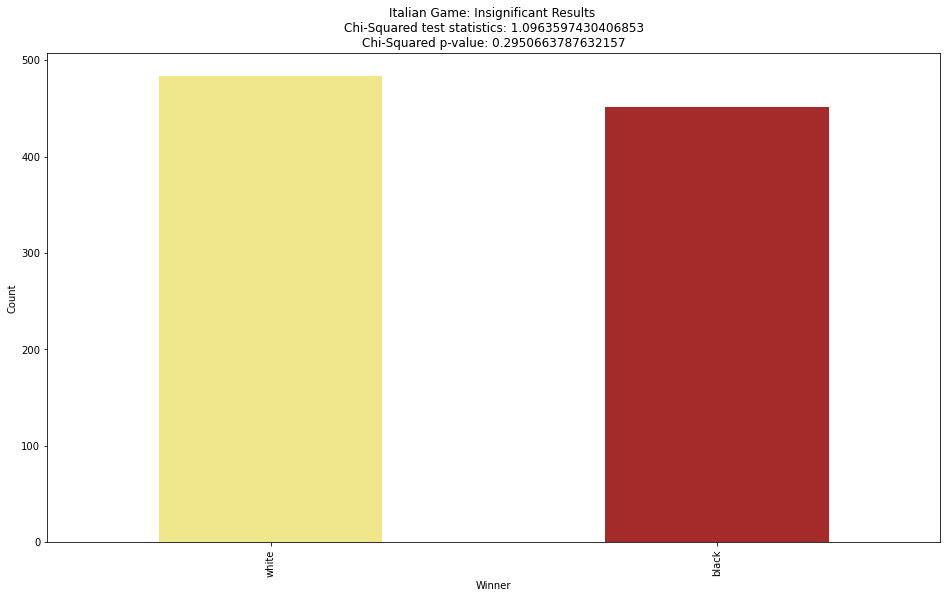

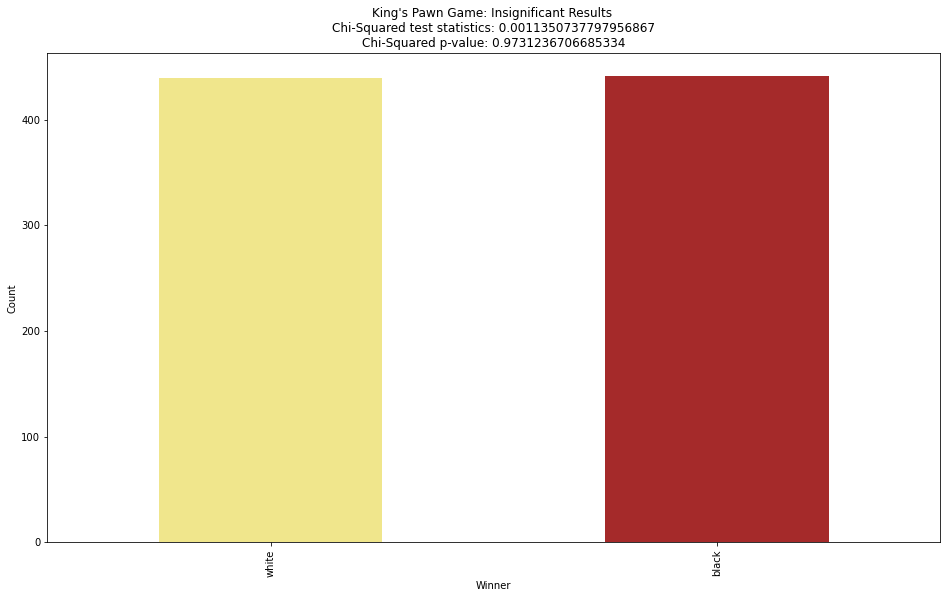

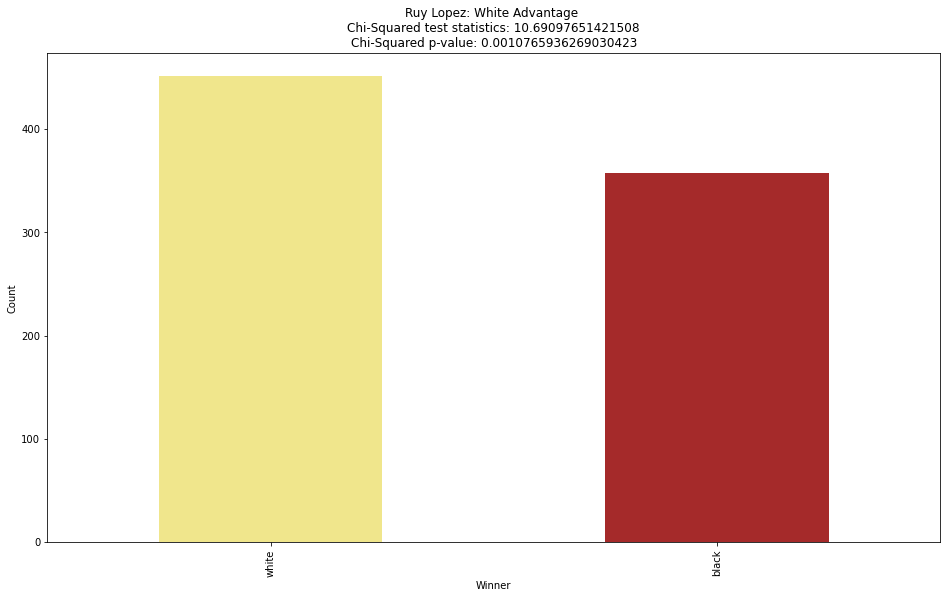

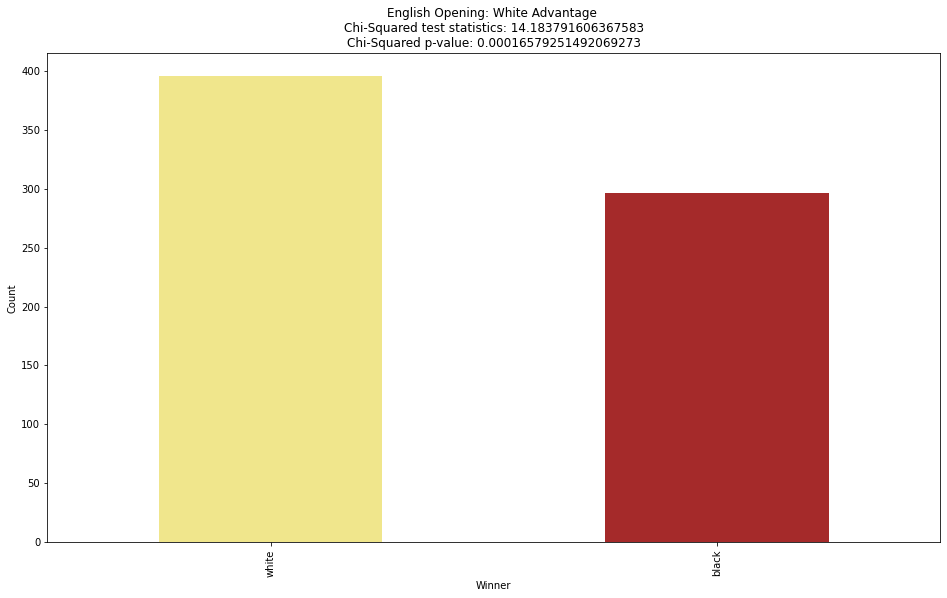

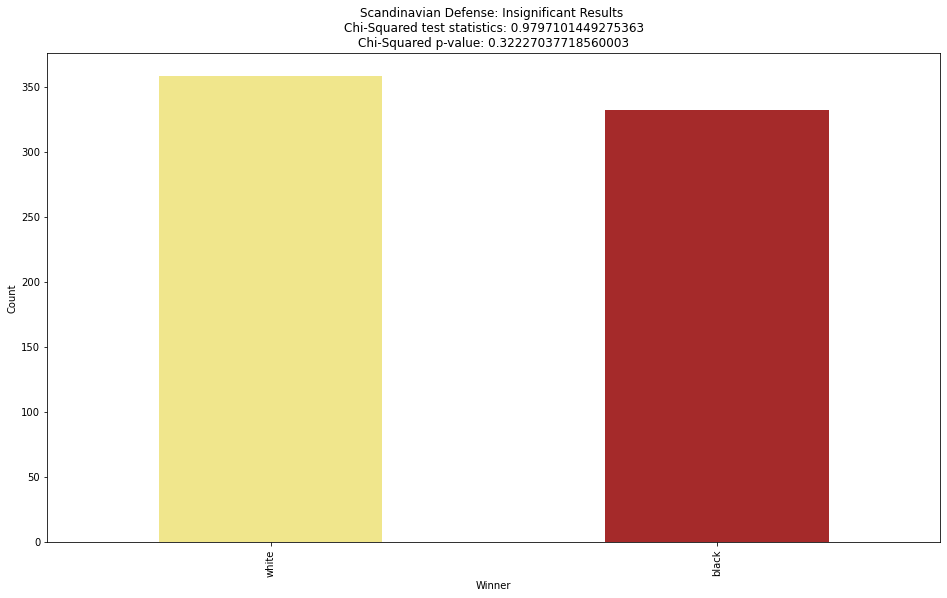

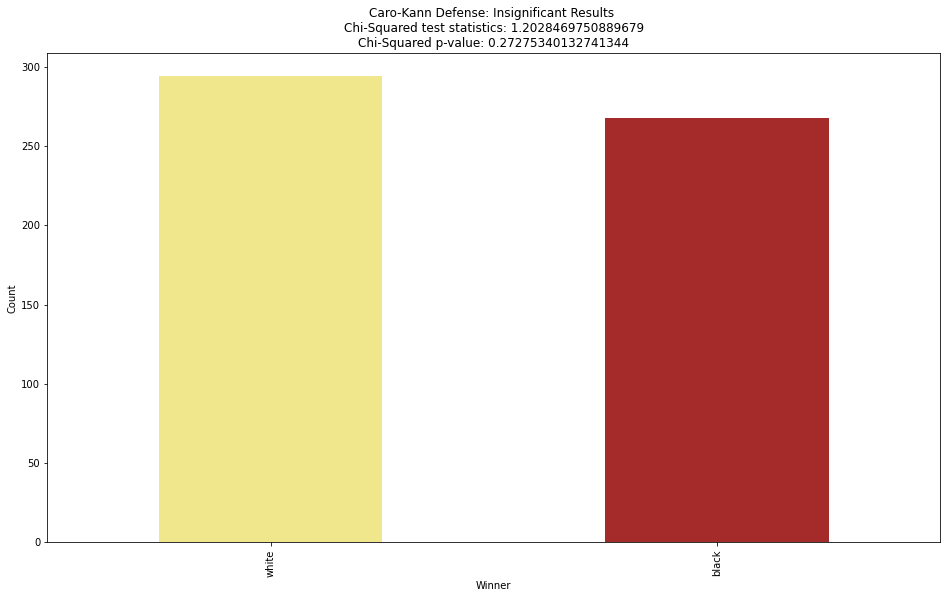

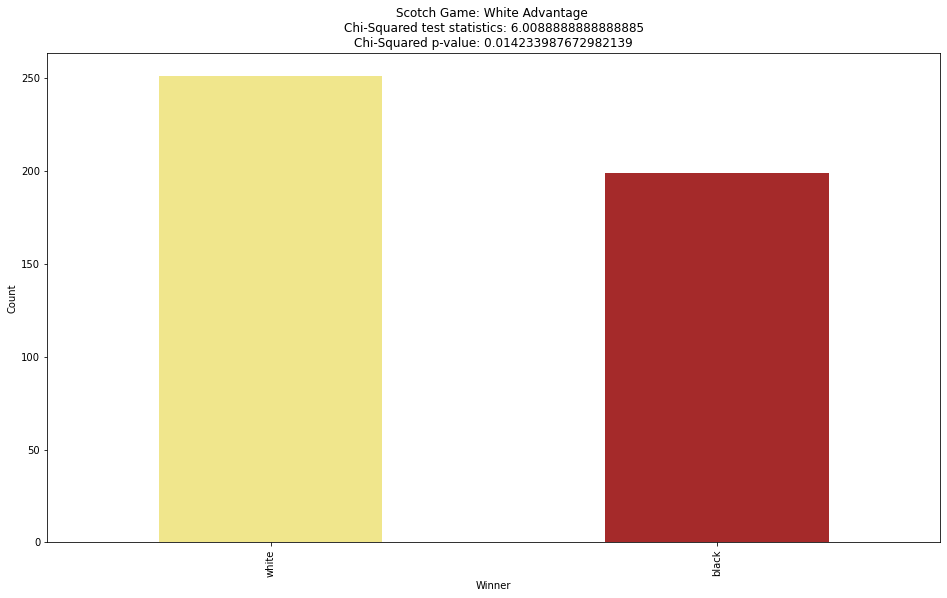

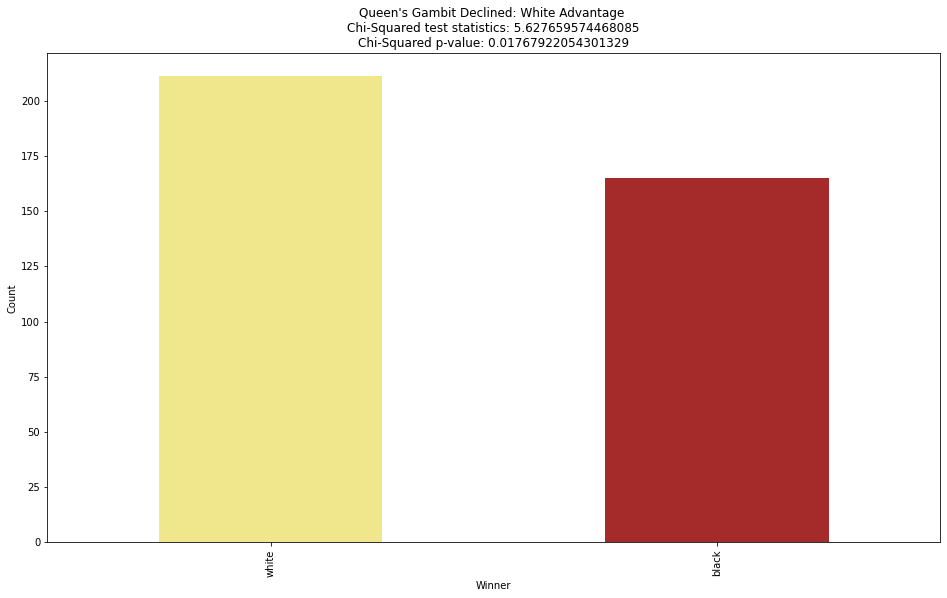

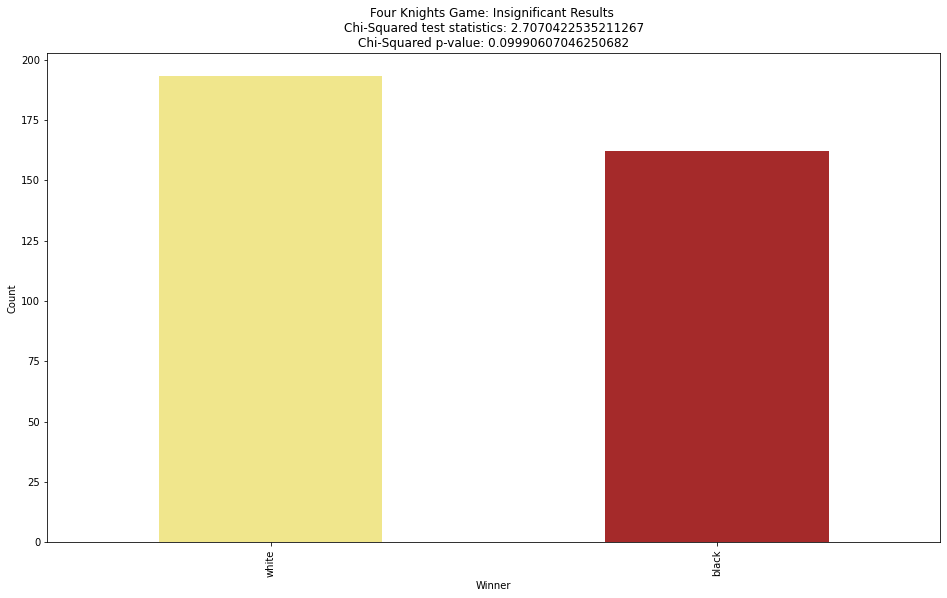

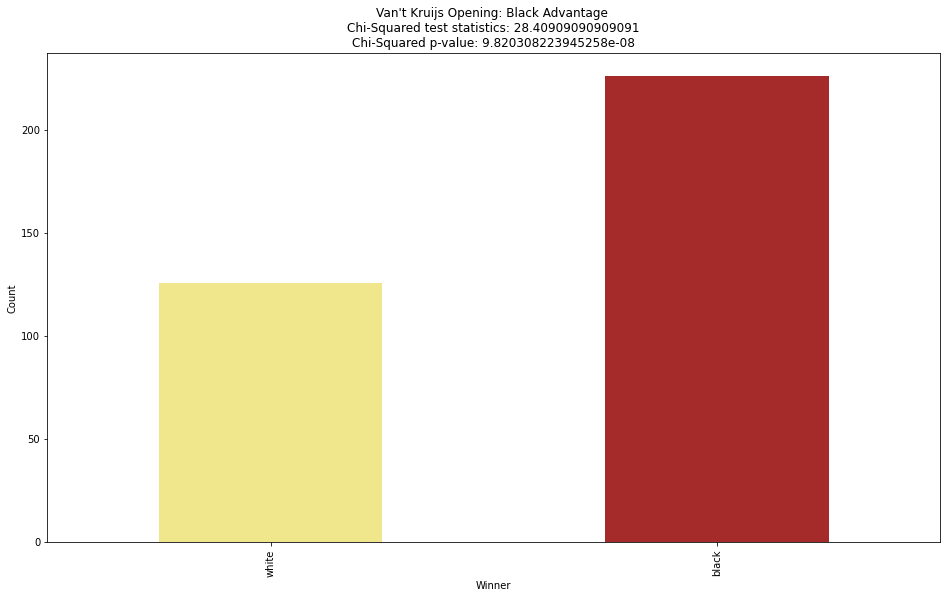

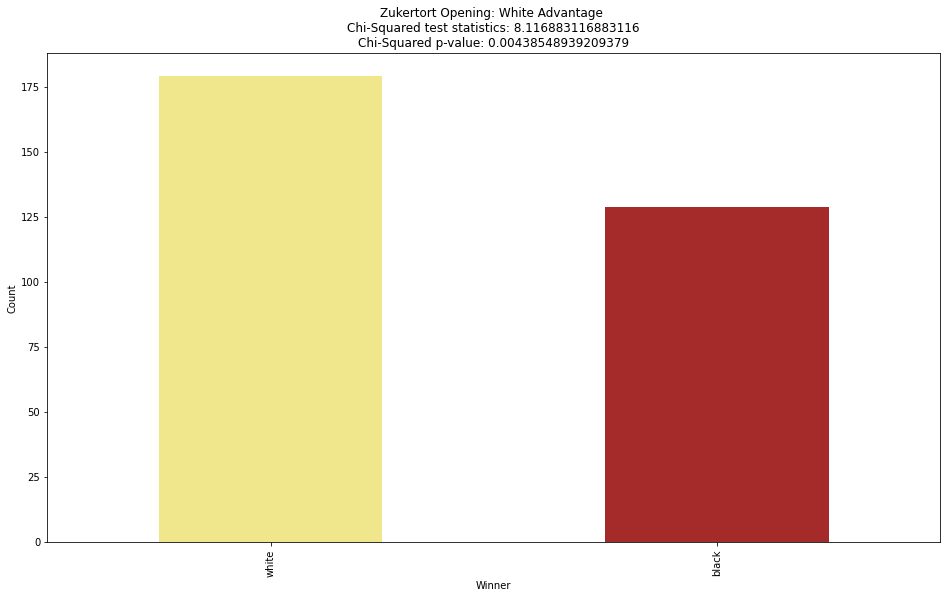

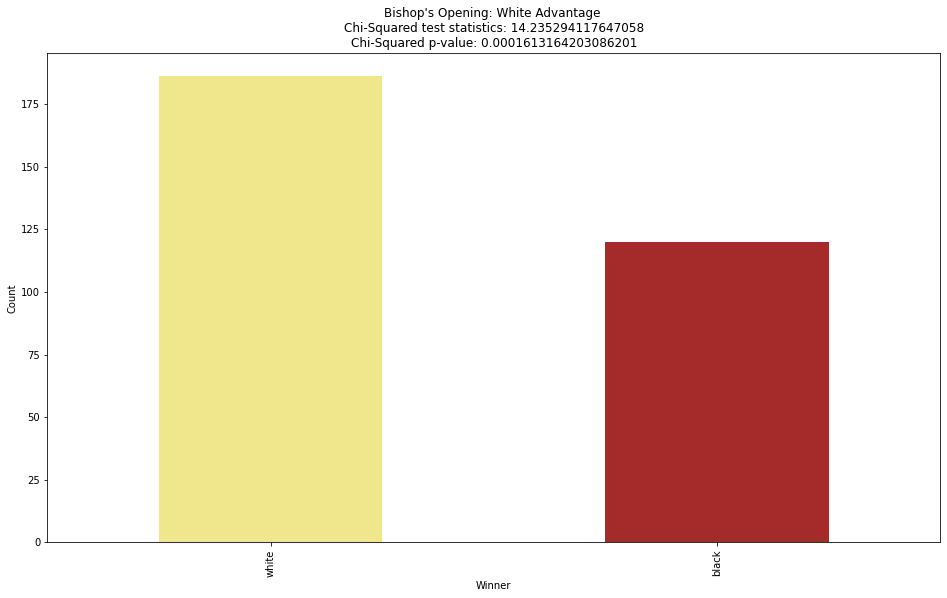

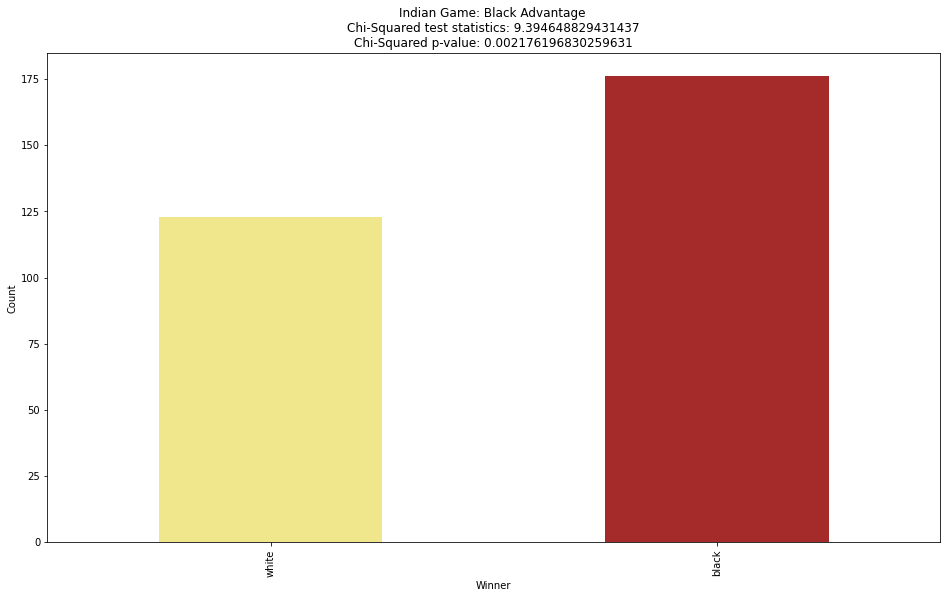

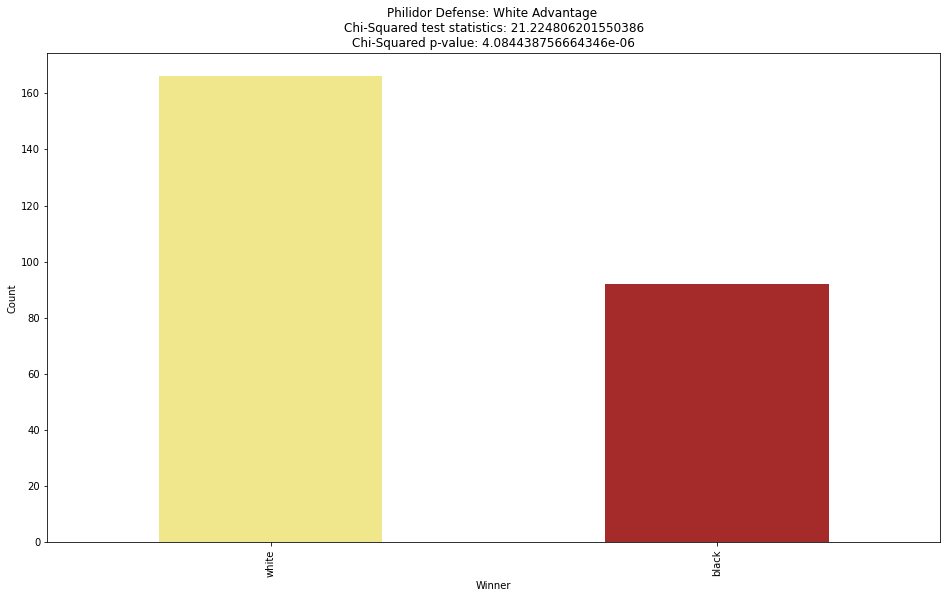

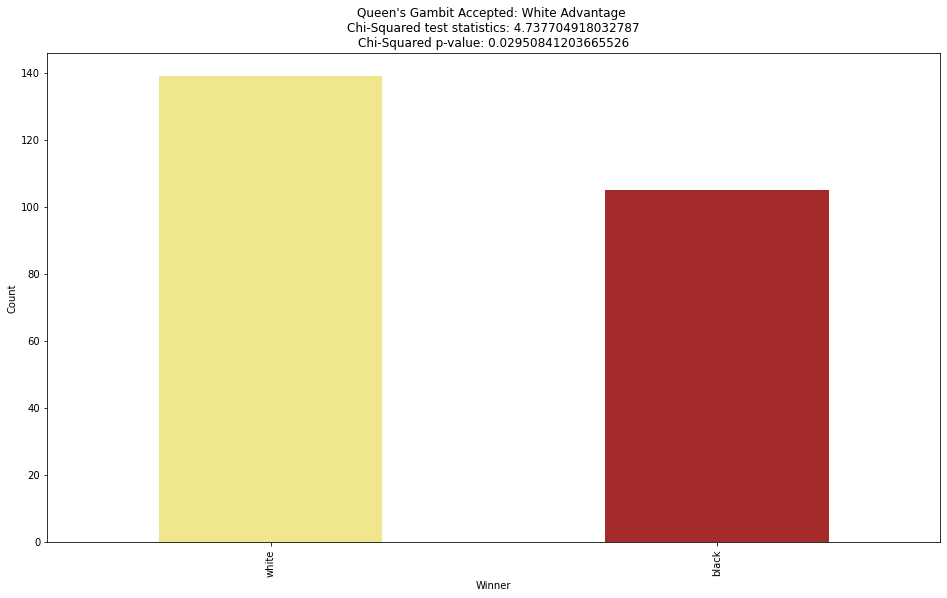

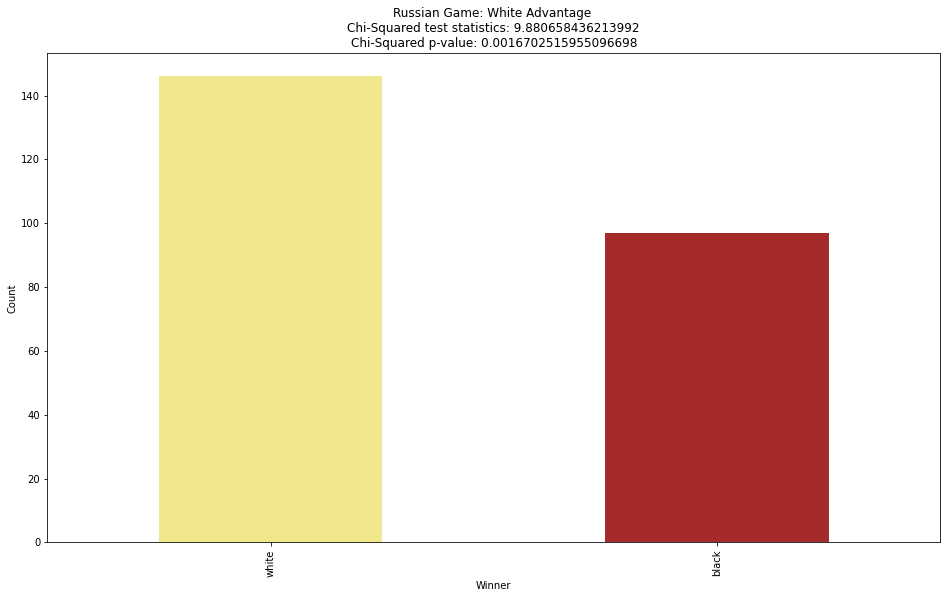

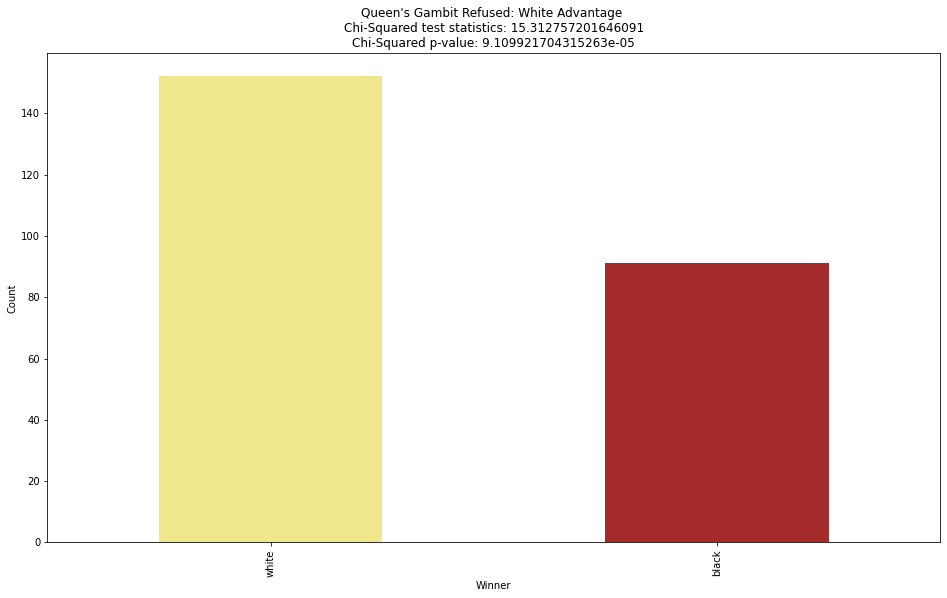

In [61]:
test = df[df['winner'] != "draw"]

for i in openings_and_results_df['Opening Name'].head(20).unique():
    test = df[df['simplified_opening'] == i]
    if len(test[test['winner'] == "black"]) > len(test[test['winner'] == "white"]):
        winner = "Black"
    else:
        winner = "White"
    stat, pval = ss.chisquare(test[test['winner'] != "draw"]["winner"].value_counts())
    if pval < 0.05:
        res = "{}: {} Advantage".format(i, winner)
    else:
        res = "{}: Insignificant Results".format(i)
    resplus = "{} \nChi-Squared test statistics: {}\nChi-Squared p-value: {}".format(res,stat,pval)
    plt.figure(figsize=(16, 9))
    test[test['winner'] != "draw"]["winner"].value_counts().sort_index(ascending=False).plot(kind = "bar", color = ['khaki',"brown"])
    
    
    plt.title(resplus)
    plt.xlabel("Winner")
    plt.ylabel("Count")
    

In [64]:
df['moves'].head()

0    d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1    d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2    e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3    d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4    e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
Name: moves, dtype: object

### Calculating number of moves til first capture

In [125]:
print("Mean Moves til First Capture: {:.2f} moves".format(np.mean(df['movestilfirstcapture'])))
print("Median Moves til First Capture: {:.0f} moves".format(np.nanmedian(df['movestilfirstcapture'])))
print("Mode Moves til First Capture: {} moves".format(int(ss.mode(df['movestilfirstcapture'])[0])))
print("Skew of Moves til First Capture: {:.2f}".format(float(ss.skew(df['movestilfirstcapture'], nan_policy="omit"))))
print("Kurtosis of Moves til First Capture: {:.2f}".format(float(ss.kurtosis(df['movestilfirstcapture'], nan_policy='omit'))))

Mean Moves til First Capture: 11.28 moves
Median Moves til First Capture: 10 moves
Mode Moves til First Capture: 6 moves
Skew of Moves til First Capture: 1.06
Kurtosis of Moves til First Capture: 1.18


### Logistic Model for Predicting Winner based on Elo Rating

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [177]:
white_rating = []
black_rating = []

for i in np.arange(500,2900):
    for j in np.arange(500,2900):
        white_rating.append(i)
        black_rating.append(j)

In [178]:
test_df = pd.DataFrame()
test_df['white_rating'] = white_rating
test_df['black_rating'] = black_rating

In [179]:
cols = ['black_rating','white_rating']
X = df[cols]
y = df['winner']

In [180]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [181]:
winner = []

for b,w in zip(test_df['black_rating'], test_df['white_rating']):
    test = np.array([b, w])
    test = test.reshape(1, -1)
    winner.append(lr.predict(test))

In [182]:
test_df['winner'] = winner

In [183]:
colors = [] 
for i in test_df['winner']:
    if i == 'white':
        colors.append("khaki")
    if i == 'black':
        colors.append("brown")

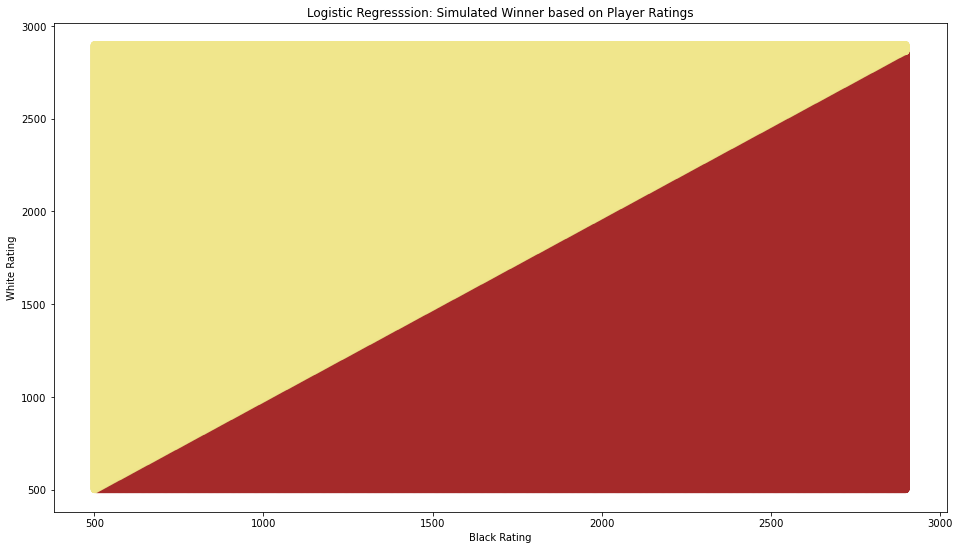

In [185]:
plt.figure(figsize=(16, 9))
plt.scatter(test_df['black_rating'], test_df['white_rating'], c=colors)
plt.title("Logistic Regresssion: Simulated Winner based on Player Ratings")
plt.xlabel("Black Rating")
plt.ylabel("White Rating");